# Spins coupled to a two-mode degenerate cavity

## Model overview

The full model has each atom with 5 Zeeman levels in the $\mathrm{Rb}\ 5S_{1/2}\ (F = 2)$ manifold (The "spin" that we care about), but also states in the $\mathrm{Rb}\ 5S_{1/2}\ (F = 1)$ manifold which we would like to repump back to $(F=2)$ ASAP (the repump light can be circular polarized), and states in the  $\mathrm{Rb}\ 5P_{3/2}$ manifold that we will use to drive Raman transitions to couple to the cavity. Each atom will be placed (pinned is a better word here because we will not be looking at the motion-spin coupling) at either a positive or a negative antinode of the cavity standing wave, and driven with a common drive field.

There are a hierarchy of approximations that I will be using, some are going to be hardcoded into the model, and some are going to be optional depending on what sections of parameter space we are concerned with. The hardcoded approximations are: 
1. Population in the $(F=1)$ ground state and in the excited states will be 0. This is the same as adiabatically eliminating the excited states so that we are left with groundstate-groundstate coupling. Dissipation via incoherent scattering from the excited state can be modeled as quantum jumps between the ground state Zeeman levels. 



The optional approximations are:
1. **Classical cavity fields**. This approximation is valid under three assumptions, that the atomic-cavity interaction is much slower than $1/\kappa$, the cavity mean photon number is high, and the cavity field is not obviously squeezed. 
    1. Fast cavity response requires $\kappa \gg g_{eff} = \frac{g\Omega}{\Delta}$. This is generally satistied. 
    2. High cavity photon number. This roughly asks for a photon detection rate above 1/us, which is generally satisfied.
    3. Non-squeezed light. Well, the Dicke interaction should ecourage squeezing of the cavity light. So this won't be accurate, but it's nontheless useful to see the atomic spin evolution by assuming a coherent cavity field. 
2. Modelling atom spins. There are a few different approximations one can make in different regimes:
    1. **The coherent regime**. Treat the sum of all atom spins as a classical spin. The Dicke Hamiltonian commutes with the total spin so Hamiltonian evolution doesn't take the total spin to other shells, while spontaneous scattering of single atom does. This approximation is valid if the atomic dynamics is much faster than the "Optical pumping rate" $\Gamma' = \Gamma \frac{\Omega^2}{\Delta^2}$. There are two time scales for atomic dynamics, one is just the Larmour frequency, the other is the cavity cooling timescale, which can be slower. In this regime, Hamiltonian dynamics + cavity cooling dominates. 
    2. **The intermediate regime**. Treat each atom as an individual spin object. There are two dynamics happening on the same timescale which could encourage or discourage bifurcation. There's optical pumping effect that will bias the individual spins based on the cavity polarization, and there's (Hamiltonian dynamics + cavity cooling) effects that will bias the spins towards lower (higher) energy for red (blue) pump-to-cavity detuning. For simiplity of computation, we can use a spin-$\frac{1}{2} chain rather than a spin-2 chain for this simulation.
    3. **The incoherent regime**. This approximation is valid only when the atomic-cavity interaction is much slower than $1/\Gamma'$, i.e. $\Gamma \frac{\Omega^2}{\Delta^2} \gg \frac{g\Omega}{\Delta}$, i.e. $\frac{\Omega}{\Delta} > \frac{g}{\Gamma} = 1/4$. This is only valid if we drive the atoms very strongly. In this regime we can model the single spins as classical spins, and decoherence can be modeled as demagnitization of single spins. 
    To sum up, my guess is that when $\frac{\Omega}{\Delta} < 0.1$, we are in the coherent regime and we can treat the spin chain as total (single-shell) spin; when $0.1 < \frac{\Omega}{\Delta} < 0.3$, we are in the intermediate regime when both coherent and incoherent forces are comparible, and we have to treat each spin as an individual quantum object (either spin-1/2 or spin-2); when $\frac{\Omega}{\Delta} > 0.3$, we are in the incoherent regime, optical pumping dominates and the system is fully classical to the point that we can model each spin as classical spin. 

It's helpful to establish a coordinate system. Let's name the cavity axis to be z, the drive light (side pump) axis to be x, and the vertical axis to be y. 
In the $Z_2$ model, the drive field will be y-polarized, and the static B field will point along x (or y); the y-polarization of the cavity field will be established by the "Rayleigh scattering" from the atoms, while the x-polarization of the cavity field will be setablished by the "Raman scattering" from the atoms. 
In the U(1) model, the drive field will be z-polarized, and the static B field will point along z; both x- and y- polarizations of the cavity field will be the result of atom Raman scattering. 


In the rest of this write-up, we are going to use spin-1/2 chain (unless it's classical) for simplicity.


## Aside: coherent VS incoherent "forces"


Here's a bold claim: what we refer to as coherent effects (the two light shift terms), are not so different from the optical pump terms, in the sense that they bthemselves do not cause the sytem to evolve towards the groundstate (or highest-energy state). It is dissipation from the cavity that either takes energy from or inject energy into the system (cavity cooling VS heating). If we look into the details of how cavity heating/cooling works, that where the cavity resonace is modifies the scattering probability of ending up in different $m_F$ states, it's also in a way how optical pumping works, by using the pump polarization and C-G coefficents to modify the scattering probability of ending up in different $m_F$ states. In both cases, (light shift + cavity cooling) and optical pumping, the dissipation structure is what sets the steady state of the system, and if such steady state evolution spontaneously breaks the symmetry of the system, we can say that the steady state bifurcates. 

There are four (anti)bifurcating forces at play: 
1. **Interference-light shift (the Dicke term)**  Pump-cavity interference creates locally circular polarized light at the atoms, which creates a ficticious B field that's perpendicular to the static B field (staggered for half-integer spaced array). This rotates the energy minimum/maximum on the Bloch sphere (in the direction) depending on the phase difference between the cavity field and the drive field, and this energy gradient ("force") is proportional to cavity field amplitude.
2. **Interference-optical pumping** Pump-cavity interference creates locally circular polarized light at the atoms, which optically pumps the atom spin towards the direction of circular polarization. This optical pump rate is proportional to cavity field amplitude.

The following two terms will be suppressed with half-integer spaced array, but can be significant for integer-spaced array, because they involve the cavity mode ifself being circularly polarized. In terms of simulation, I will assume that these terms don't exist for the half-integer spaced $Z_2$ model by modeling the cavity to have only the y-polarized mode. In terms of a hypothetical experiment, if the caviy has a large linear birefingence thats much larger than $\kappa$, it will also remove the following terms.

3. **Cavity-light shift** The x polarized cavity mode interfere with the y polarized cavity mode, i.e., the circular polarizied cavity modes, creates globally circular polarized light at the atoms. In the $Z_2$ model, This rotates the energy minimum/maximum on the Bloch sphere (in the direction) depending on the circularity of the cavity field. In the $U(1)$ model, this causes the Larmor frequency to increase/decrease depending on the circularity of the cavity field. This energy gradient ("force") is proportional to the intensity of the circular cavity field.
4. **Cavity-optical pumping** The x polarized cavity mode interfere with the y polarized cavity mode, i.e., the circular polarizied cavity modes, creates globally circular polarized light at the atoms. This causes optical pump along the cavity axis, at a rate that is proportional to the intensity of the circular cavity field. 

In the integer-spaced U(1) model, because the latter two terms are aligned with the static B field, they could either be boring, or could make the U(1) model a SU(2) model by having the cavity polarization extend to the entire Poincare sphere.


## Aside: the circular birefringent two-mode cavity

---

when the collective atom spin is allowed to have a large non-zero projection along the cavity axis (which is not the case in the half-integer spacing setup), the RHC and LHC polarization of the cavity becomes birefringent and therefore frequency shifted. This make it natural to always use the cavity axis as the quantization axis, because the linear polarized cavity modes are generally not an eigenmode anymore. 


## various configurations


We will encode the RCP cavity mode as $$a_R = \frac{a_y - i a_x}{\sqrt{2}},$$  $$a_L = \frac{a_y + i a_x}{\sqrt{2}}.$$

Inversely, $$a_y = \frac{a_R + a_L}{\sqrt{2}},$$  $$a_x = \frac{i a_R - i a_L}{\sqrt{2}}.$$

The following gauge transformation can be performed on a single atom: 
$
g \rightarrow -g \quad
\Omega \rightarrow -\Omega
$
and not cause physical difference. So moving an atom to the opposite antinode is the same as changing the local drive field by $\pi$ phase.

In the most general case, the Drive field can vary in phase for each atom, and it can be of any polarization in the y-z plane. 
$$\Omega_n = e^{i\phi_n} (\Omega_y \bm{\hat{y}} + \Omega_x \bm{\hat{x}})$$


In particular, we will consider the following cases: 

1. Integer spaced atom driven with y-polarized light. $\Omega_n = \Omega \bm{\hat{y}}$

1. Half-integer spaced atom driven with y-polarized light. $\Omega_n = (-1)^n \Omega \bm{\hat{y}}$

1. Integer spaced atom driven with x-polarized light. $\Omega_n = \Omega \bm{\hat{x}}$

1. Half-integer spaced atom driven with x-polarized light. $\Omega_n = \Omega  (-1)^n \bm{\hat{x}}$

1. Integer spaced atom driven with circular-polarized light. $\Omega_n = \Omega \frac{\bm{\hat{y}} + i \bm{\hat{x}}}{\sqrt{2}}$

1. Half-integer spaced atom driven with circular-polarized light. $\Omega_n = \Omega (-1)^n \frac{\bm{\hat{y}} + i \bm{\hat{x}}}{\sqrt{2}}$




## example level structures

(-0.5, -1.5)
(-0.5, 0.5)
(0.5, -0.5)
(0.5, 1.5)
(-0.4, -1.4)
(-0.4, 0.6)
(0.6, -0.4)
(0.6, 1.6)


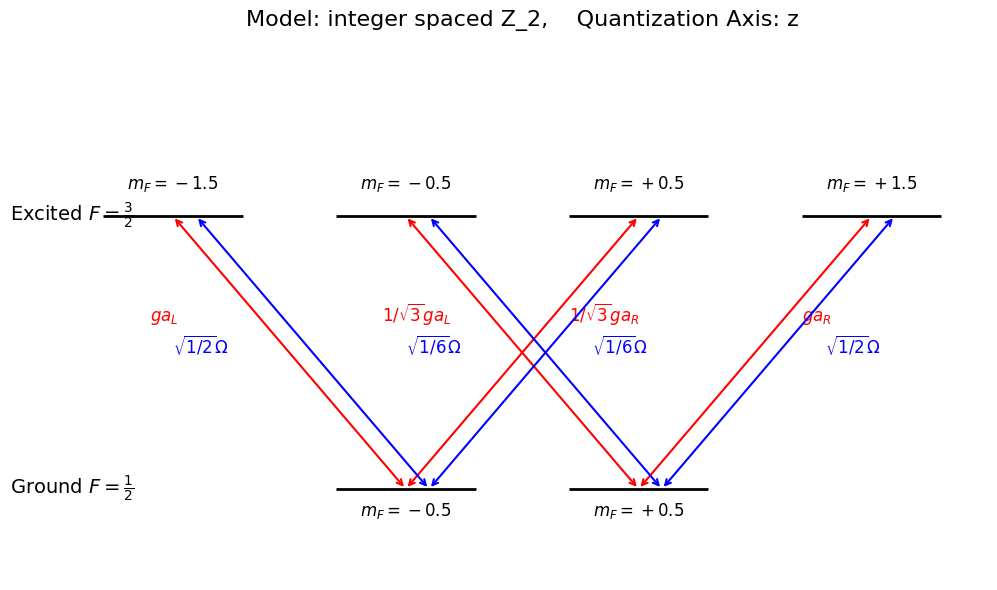

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Ground and excited mF states
ground_states = [-0.5, 0.5, -0.4, 0.6]
excited_states = [-1.5, -0.5, 0.5, 1.5, -1.4, -0.4, 0.6, 1.6]

# Clebsch–Gordan coefficients (symbolic labels for each transition)
cg_labels = {
    (-0.5, -1.5): r' g a_L',
    (-0.5,  0.5): r'1/\sqrt{3} g a_R',
    ( 0.5, -0.5): r'1/\sqrt{3} g a_L',
    ( 0.5,  1.5): r' g a_R',
    (-0.4, -1.4): r'\sqrt{1/2}\Omega',
    (-0.4,  0.6): r'\sqrt{1/6}\Omega',
    ( 0.6, -0.4): r'\sqrt{1/6}\Omega',
    ( 0.6,  1.6): r'\sqrt{1/2}\Omega',
}

fig, ax = plt.subplots(figsize=(10, 6))

# Vertical positions
y_ground = 0
y_excited = 3

# Plot ground state levels
for x in ground_states[:2]:
    ax.hlines(y_ground, x - 0.3, x + 0.3, color='black', linewidth=2)
    ax.text(x, y_ground - 0.3, f'$m_F={x:+.1f}$', ha='center', fontsize=12, color='black')

# Plot excited state levels
for x in excited_states[:4]:
    ax.hlines(y_excited, x - 0.3, x + 0.3, color='black', linewidth=2)
    ax.text(x, y_excited + 0.3, f'$m_F={x:+.1f}$', ha='center', fontsize=12, color='black')

# Draw transitions with symbolic CG labels
for x_g in ground_states:
    for x_e in excited_states:
        delta_m = x_e - x_g
        if abs(abs(delta_m) - 1)<0.01:
            key = (x_g, x_e)
            print(key)
            if key in cg_labels:
                label = cg_labels[key]

                # Determine color by Δm
                if (2*x_g)%1 != 0:
                    color = 'blue'   # π
                    y_label_shift = 0
                else:
                    color = 'red'    # σ⁺ or σ⁻
                    y_label_shift = 0.35

                # Draw double-headed arrow
                ax.annotate('', xy=(x_e, y_excited), xytext=(x_g, y_ground),
                            arrowprops=dict(arrowstyle='<->', color=color, linewidth=1.5))

                # Position label near midpoint of arrow
                x_mid = (x_g + x_e) / 2
                y_mid = (y_ground + y_excited) / 2
                ax.text(x_mid + delta_m *0.4-0.2, y_mid+y_label_shift, f'${label}$', fontsize=12, color=color)

# Level labels
ax.text(-2.2, y_ground, r'Ground $F = \frac{1}{2}$', fontsize=14, va='center', color='black')
ax.text(-2.2, y_excited, r'Excited $F' + "=\\frac{3}{2}$", fontsize=14, va='center', color='black')

# Format plot
ax.set_ylim(-1, 5)
ax.set_xlim(-2, 2)
ax.axis('off')
ax.set_title('Model: integer spaced Z_2,    Quantization Axis: z', fontsize=16, color='black')
plt.tight_layout()
plt.show()


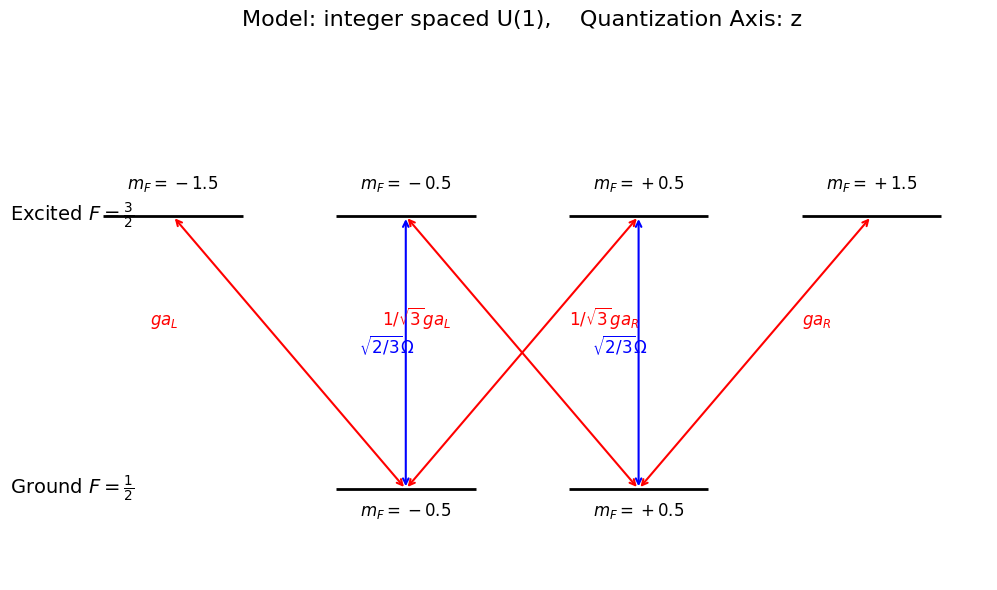

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Ground and excited mF states
ground_states = [-0.5, 0.5]
excited_states = [-1.5, -0.5, 0.5, 1.5]

# Clebsch–Gordan coefficients (symbolic labels for each transition)
cg_labels = {
    (-0.5, -1.5): r' g a_L',
    (-0.5, -0.5): r'\sqrt{2/3}\Omega',
    (-0.5,  0.5): r'1/\sqrt{3} g a_R',
    ( 0.5, -0.5): r'1/\sqrt{3} g a_L',
    ( 0.5,  0.5): r'\sqrt{2/3}\Omega',
    ( 0.5,  1.5): r' g a_R',
}

fig, ax = plt.subplots(figsize=(10, 6))

# Vertical positions
y_ground = 0
y_excited = 3

# Plot ground state levels
for x in ground_states:
    ax.hlines(y_ground, x - 0.3, x + 0.3, color='black', linewidth=2)
    ax.text(x, y_ground - 0.3, f'$m_F={x:+.1f}$', ha='center', fontsize=12, color='black')

# Plot excited state levels
for x in excited_states:
    ax.hlines(y_excited, x - 0.3, x + 0.3, color='black', linewidth=2)
    ax.text(x, y_excited + 0.3, f'$m_F={x:+.1f}$', ha='center', fontsize=12, color='black')

# Draw transitions with symbolic CG labels
for x_g in ground_states:
    for x_e in excited_states:
        delta_m = x_e - x_g
        if abs(delta_m) <= 1:
            key = (x_g, x_e)
            if key in cg_labels:
                label = cg_labels[key]

                # Determine color by Δm
                if delta_m == 0:
                    color = 'blue'   # π
                else:
                    color = 'red'    # σ⁺ or σ⁻

                # Draw double-headed arrow
                ax.annotate('', xy=(x_e, y_excited), xytext=(x_g, y_ground),
                            arrowprops=dict(arrowstyle='<->', color=color, linewidth=1.5))

                # Position label near midpoint of arrow
                x_mid = (x_g + x_e) / 2
                y_mid = (y_ground + y_excited) / 2
                ax.text(x_mid + delta_m *0.4-0.2, y_mid+abs(delta_m)*0.3, f'${label}$', fontsize=12, color=color)

# Level labels
ax.text(-2.2, y_ground, r'Ground $F = \frac{1}{2}$', fontsize=14, va='center', color='black')
ax.text(-2.2, y_excited, r'Excited $F' + "=\\frac{3}{2}$", fontsize=14, va='center', color='black')

# Format plot
ax.set_ylim(-1, 5)
ax.set_xlim(-2, 2)
ax.axis('off')
ax.set_title('Model: integer spaced U(1),    Quantization Axis: z', fontsize=16, color='black')
plt.tight_layout()
plt.show()


# Hamiltonians and jump operators

# Case 1: Integer spaced atom driven with y-polarized light. ($Z_2$)


The interaction Hamiltonian for a spin-1/2 chain to a two-mode cavity is:
$$
\begin{aligned}
H_\text{int} &= \sum_n \ket{\uparrow_n}\bra{\uparrow_n} \frac{(\frac{\Omega}{\sqrt{2}}+2g a_R)(\frac{\Omega}{\sqrt{2}}+2g a_R^\dagger) + (\frac{\Omega}{\sqrt{6}}+\frac{2g a_L}{\sqrt{3}})(\frac{\Omega}{\sqrt{6}}+\frac{2g a_L^\dagger}{\sqrt{3}})}{2\Delta} 
+  \sum_n \ket{\downarrow_n}\bra{\downarrow_n} \frac{(\frac{\Omega}{\sqrt{2}}+2g a_L)(\frac{\Omega}{\sqrt{2}}+2g a_L^\dagger) + (\frac{\Omega}{\sqrt{6}}+\frac{2g a_R}{\sqrt{3}})(\frac{\Omega}{\sqrt{6}}+\frac{2g a_R^\dagger}{\sqrt{3}})}{2\Delta} \\
&= \frac{\sum_n s_n^z }{\Delta} \left[\frac{2}{3} \Omega g (-i a_x + i a_x^\dagger) + \frac{4}{3} g^2 (n_R - n_L)  \right] 
+ \frac{\mathbf{1}}{\Delta} \left[\frac{1}{3} \Omega^2 + \frac{2}{3} \Omega g (a_y +  a_y^\dagger) + \frac{4}{3} g^2 (n_R + n_L)  \right]
\end{aligned}
$$

As a result, 
$$ H = (-\delta + \delta_\text{cav}) (n_R+n_L) + \chi (\sum_n s_n^z) (n_R-n_L)  + \sum_n \left[ (\omega_L s_n^x - \bm{B_\text{fict}}\cdot\bm{s}_n) +g^{(n)}_\text{eff} s_n^z (-i a_x + i a_x^\dagger) +g^{(n)}_\text{eff}  (a_y +  a_y^\dagger)  \right],$$

$$ \text{where}
\left\{
    \begin{aligned}
    g^{(n)}_\text{eff} &= \frac{2}{3}\frac{g \Omega_n}{\Delta}\\
    \chi &= \frac{4}{3}\frac{g^2}{\Delta}
    \end{aligned}
    \right.
     $$

Note that:
1. $\delta_\text{cav} = \sum_n \frac{4}{3} \frac{g^2}{\Delta}$ is the common-mode cavity pulling term. It's not dependent on the atomic state, so it can be absorbed into $\delta$. This term is effectively zero. 
2. $\bm{B_\text{fict}}$ is the fictitous field from the drive light. In the spin-1/2 model if there's no tensor Stark shift and the vector stark shift is zero with linear polarized drive light. This term is effectively zero. 
3. $g_\text{eff}$ is the spin coupling term proportional to the cavity field, both for rayleigh and Raman scatering. Raman scattering is the Dicke term. Rayleigh scattering term is zero in the half-integer spaced case, but nonzero for integer spaced array.
4. $\chi$ is the spin coupling term proportional to the cavity photon number. This is the cavity pulling term.
5. Here $\Omega$ is defined by the Rabi frequency of  the stretched transition. Similarly, $g$ is defined by that of the streched state transition for convinience.
6. x and z are swapped when compared to the typical Dicke Hamiltonian, due to our naming of basis.
---
To write out the (post elimination) jump operators, we can set the quantization axis to be along cavity (z). In this basis, the local summed optical field can be projected onto the $\sigma^+$ and $\sigma^-$ light (here I'm assuming $\ket{1/2,1/2}\rightarrow\ket{3/2,-1/2}$ transition for convinience): 
$$ \Omega_{+} = \frac{ \Omega_y + 2\sqrt{2} g a_R }{\sqrt{6}}, \quad \Omega_- = \frac{\Omega_y  + 2\sqrt{2} g a_L }{\sqrt{6}}$$
Which gives the effective decay rates for each single atom (only in the spin-1/2 model, otherwise there will also be $m_F \pm2$ processes):
$$
\sqrt{\gamma_{\frac{1}{2}\leftarrow\frac{-1}{2}}} =  \left|\frac{\Omega_+}{\Delta}\right|\sqrt{\frac{1}{6}\Gamma}   ,\quad
\gamma_{\frac{-1}{2}\leftarrow\frac{1}{2}} = \frac{1}{6} \left| \frac{\Omega_-}{\Delta} \right|^2 \Gamma ,\quad
\gamma_{\frac{1}{2}\leftarrow\frac{1}{2}} = \left[ \frac{3}{4} \left| \frac{\Omega_+}{\Delta} \right|^2 + \frac{1}{12} \left| \frac{\Omega_-}{\Delta} \right|^2 \right] \Gamma ,\quad
\gamma_{\frac{-1}{2}\leftarrow\frac{-1}{2}} = \left[ \frac{3}{4} \left| \frac{\Omega_-}{\Delta} \right|^2 + \frac{1}{12} \left| \frac{\Omega_+}{\Delta} \right|^2 \right] \Gamma
$$
Thus the Lindblad jump operators are $L_{k\leftarrow j} = \sqrt{\gamma_{k\leftarrow j}} \ket{k}\bra{j}$, respectively. assuming $\Omega_y=\Omega$, $g$ are real, we have:
$$
\begin{aligned}
L_{\frac{1}{2}\leftarrow\frac{-1}{2}} &= \frac{\sqrt{\Gamma}}{6 \Delta} \sqrt{\left(\Omega + 2\sqrt{2} g \, \textbf{Re}(a_R) \right)^2 + \left(2\sqrt{2} g \, \textbf{Im}(a_R)\right)^2}  \ket{\frac{1}{2}}\bra{\frac{-1}{2}}  \\
L_{\frac{-1}{2}\leftarrow\frac{1}{2}} &= \frac{\sqrt{\Gamma}}{6 \Delta} \sqrt{\left(\Omega + 2\sqrt{2} g \, \textbf{Re}(a_L) \right)^2 + \left(2\sqrt{2} g \, \textbf{Im}(a_L)\right)^2}  \ket{\frac{1}{2}}\bra{\frac{-1}{2}}  \\
L_{\frac{1}{2}\leftarrow\frac{1}{2}} &= \frac{\sqrt{5 \Gamma}}{6 \Delta}  \sqrt{\Omega^2 + \frac{2\sqrt{2}}{5} \Omega g \Big( 9\textbf{Re}(a_R)+\textbf{Re}(a_L)\Big) + \frac{4}{5} g^2 \Big( 9 n_R + n_L \Big) } \ket{\frac{1}{2}}\bra{\frac{1}{2}} \\
L_{\frac{-1}{2}\leftarrow\frac{-1}{2}} &= \frac{\sqrt{5 \Gamma}}{6 \Delta}  \sqrt{\Omega^2 + \frac{2\sqrt{2}}{5} \Omega g \Big( 9\textbf{Re}(a_L)+\textbf{Re}(a_R)\Big) + \frac{4}{5} g^2 \Big( 9 n_L + n_R \Big) } \ket{\frac{1}{2}}\bra{\frac{1}{2}} 
\end{aligned}
$$

In the limit that $|\Omega|\gg |g a_x |$ that we are in:
$$
\begin{aligned}
L_{\frac{1}{2}\leftarrow\frac{-1}{2}} &\simeq \frac{\sqrt{\Gamma}}{6 \Delta} \left(\Omega + 2\sqrt{2} g \, \textbf{Re}(a_R) \right)  \ket{\frac{1}{2}}\bra{\frac{-1}{2}}  \\
L_{\frac{-1}{2}\leftarrow\frac{1}{2}} &\simeq \frac{\sqrt{\Gamma}}{6 \Delta} \left(\Omega + 2\sqrt{2} g \, \textbf{Re}(a_L) \right)  \ket{\frac{1}{2}}\bra{\frac{-1}{2}}  \\
L_{\frac{1}{2}\leftarrow\frac{1}{2}} &\simeq \frac{\sqrt{5 \Gamma}}{6 \Delta}  \left(\Omega + \frac{\sqrt{2}}{5} \Omega g \Big( 9\textbf{Re}(a_R)+\textbf{Re}(a_L)\Big) \right) \ket{\frac{1}{2}}\bra{\frac{1}{2}} \\
L_{\frac{-1}{2}\leftarrow\frac{-1}{2}} &\simeq \frac{\sqrt{5 \Gamma}}{6 \Delta}  \left(\Omega + \frac{\sqrt{2}}{5} \Omega g \Big( 9\textbf{Re}(a_L)+\textbf{Re}(a_R)\Big) \right) \ket{\frac{1}{2}}\bra{\frac{1}{2}} \\
\end{aligned}
$$




 Note that inside $\Omega_+$ and $\Omega_-$ there are cavity jump operators as well, which means that if we don't treat the cavity field as classical, we'll need to expand these jump operators in the direct product basis. If we assume $g\langle a_x\rangle \ll \Omega$, we can also throw away the second-order cavity field terms. 

$$
\begin{aligned}
L_{\frac{1}{2}\leftarrow\frac{-1}{2}} &= \frac{\sqrt{\Gamma}}{6 \Delta} \sum_m\left(\Omega \hat{\sigma^+_n} +2\sqrt{2} g \hat{\sigma^+_n} \hat{a_R} \right)\\
L_{\frac{-1}{2}\leftarrow\frac{1}{2}} &= \frac{\sqrt{\Gamma}}{6 \Delta} \sum_m\left(\Omega \hat{\sigma^-_n} +2\sqrt{2} g \hat{\sigma^-_n} \hat{a_L} \right)\\
L_{\frac{1}{2}\leftarrow\frac{1}{2}}^{(1)} &= \frac{\sqrt{\Gamma}}{2\sqrt{2} \Delta} \sum_m\left(\Omega \hat{P^\uparrow_n} +2\sqrt{2} g \hat{P^\uparrow_n} \hat{a_R} \right)\\
L_{\frac{1}{2}\leftarrow\frac{1}{2}}^{(2)} &= \frac{\sqrt{\Gamma}}{6\sqrt{2}  \Delta} \sum_m\left(\Omega \hat{P^\uparrow_n} +2\sqrt{2} g \hat{P^\uparrow_n} \hat{a_L} \right)\\
L_{\frac{1}{2}\leftarrow\frac{1}{2}}^{(1)} &= \frac{\sqrt{\Gamma}}{6\sqrt{2} \Delta} \sum_m\left(\Omega \hat{P^\downarrow_n} +2\sqrt{2} g \hat{P^\downarrow_n} \hat{a_R} \right)\\
L_{\frac{1}{2}\leftarrow\frac{1}{2}}^{(2)} &= \frac{\sqrt{\Gamma}}{2\sqrt{2}  \Delta} \sum_m\left(\Omega \hat{P^\downarrow_n} +2\sqrt{2} g \hat{P^\downarrow_n} \hat{a_L} \right)
\end{aligned}
$$

<!-- $$
L_{\frac{1}{2}\leftarrow\frac{1}{2}}^{(tot)} &\simeq \frac{\sqrt{5 \Gamma}}{3\sqrt{2} \Delta} \sum_m\left(\Omega \ket{\frac{1}{2}, m}\bra{\frac{1}{2}, m} - \frac{8}{5} i g\sqrt{m} \ket{\frac{1}{2}, m-1}\bra{\frac{1}{2}, m}  \right)\\
L_{\frac{-1}{2}\leftarrow\frac{-1}{2}}^{(tot)} &\simeq \frac{\sqrt{5 \Gamma}}{3\sqrt{2} \Delta} \sum_m\left(\Omega \ket{\frac{-1}{2}, m}\bra{\frac{-1}{2}, m} + \frac{8}{5} i g\sqrt{m} \ket{\frac{-1}{2}, m-1}\bra{\frac{-1}{2}, m}  \right)\\
$$ -->

<!-- Note that we can either use the $(1)$ and $(2)$ superscripted operators, or the $(tot)$ operators as a justified approximation. In the former case there are six composite jump operators, and the the latter case there are two.  -->

In addition, the cavity-to-freespace jump operator $L_\text{cav} = \sqrt{\kappa}\, a_x$. I'm using the convention where $\kappa$ and $\Gamma$ are FWHM.




## Treating the spins as a single collective spin

---

### classic total spin in classical cavity (coherent regime)
---
As discussed before, the system can be approximated as the on-shell evolution of the total spin $\bm{S}$ in the coherent limit. This is equivalent to neglecting all the jump operators except for $L_\text{cav}$. In this section we will write down the equation of motion of the total spin coupled to a harmonic osillator in both the classical and quantum mechanical language (where squeezing can occur). 

rewrite Hamiltonian in the ax, ay basis:

$$ H = -\delta  (n_x+n_y) + \chi (\sum_n s_n^z) (n_R-n_L)  + \sum_n \left[ (\omega_L s_n^x) +g_\text{eff} s_n^z (-i a_x + i a_x^\dagger) +g_\text{eff} ( a_y +  a_y^\dagger)  \right],$$
$$ H = -\delta  (n_x+n_y) + \chi (\sum_n s_n^z)\; i(a_x^\dagger a_y - a_y^\dagger a_x)  + \sum_n \left[ (\omega_L s_n^x) +g_\text{eff} s_n^z (-i a_x + i a_x^\dagger) +g_\text{eff} ( a_y +  a_y^\dagger)  \right],$$

$$ \text{where}
\left\{
    \begin{aligned}
    g_\text{eff} &= \frac{2}{3}\frac{g \Omega}{\Delta}  \quad\times (-1)^n \text{ if half-integer spaced}\\
    \chi &= \frac{4}{3}\frac{g^2}{\Delta}
    \end{aligned}
    \right.
     $$

Let's define $S^x = \sum_n s_n^x, \; S^y = \sum_n s_n^y, \; S^z = \sum_n s_n^z; \; \Pi^x = \sum_n s_n^x = S^x, \; \Pi^y = \sum_n (-1)^n s_n^y, \; \Pi^z = \sum_n (-1)^n  s_n^z; $ The reason I flipped y-spin as well is so that $\Pi$ operators follows the same comutator relationships as a normal angular momentum operator, so that for the half-integer spaced case, the "total spin" $\Pi$ is just rotating every other spin in the chain around the x-axis by 180 degrees. 

Let's rewrite the Master equation in this regime:


$$ H = -\delta  (a_x^\dagger a_x + a_y^\dagger a_y) + \chi S^z\; i(a_x^\dagger a_y - a_y^\dagger a_x) + \omega_L S^x +g_\text{eff} S^z (i a_x^\dagger -i a_x) + N g_\text{eff} (a_y^\dagger + a_y) ,\quad L_\text{cav,x} = \sqrt{\kappa}\, a_x,\; L_\text{cav,y} = \sqrt{\kappa}\, a_y$$  

for integer spaced array, And:

$$ H = -\delta  (a_x^\dagger a_x + a_y^\dagger a_y) + \chi S^z\; i(a_x^\dagger a_y - a_y^\dagger a_x) + \omega_L \Pi^x +g_\text{eff} \Pi^z (i a_x^\dagger -i a_x)  ,\quad L_\text{cav,x} = \sqrt{\kappa}\, a_x,\; L_\text{cav,y} = \sqrt{\kappa}\, a_y$$  

for half-integer spaced array, where $ g_\text{eff } = \frac{2}{3}\frac{g \Omega}{\Delta},\; \chi = \frac{4}{3}\frac{g^2}{\Delta}$.


where $\rho$ is a $N+1 \times M$ dimensional tensor, where $M$ is the truncated Fock state basis dimension of the cavity. 

---

From the Master equation above, we can write out the classical equations of motion for $\langle a_x \rangle = \alpha_{xr} + i \alpha_{xi} $, $\langle a_y \rangle = \alpha_{yr} + i \alpha_{yi} $, $\langle \bm{S} \rangle = S^x \bm{e}_x + S^y \bm{e}_y + S^z \bm{e}_z$, $\langle \bm{\Pi} \rangle = S^x \bm{e}_x + \Pi^y \bm{e}_y + \Pi^z \bm{e}_z$ after mean-field approximation. 



The integer-spaced case will have cavity pulling effects:

$$
\left\{
\begin{aligned}
\frac{d\alpha_{xr}}{dt} &= -\delta\, \alpha_{xi} - \frac{\kappa}{2} \alpha_{xr} + g_\text{eff } S^z +\chi S^z \alpha_{yr}\\
\frac{d\alpha_{xi}}{dt} &= \delta\, \alpha_{xr} - \frac{\kappa}{2} \alpha_{xi} +\chi S^z \alpha_{yi} \\
\frac{d\alpha_{yr}}{dt} &= -\delta\, \alpha_{yi} - \frac{\kappa}{2} \alpha_{yr} - \chi S^z \alpha_{xr}\\
\frac{d\alpha_{yi}}{dt} &= -N g_\text{eff } +\delta\, \alpha_{yr} - \frac{\kappa}{2} \alpha_{yi} -\chi S^z \alpha_{xi} \\
\\
\frac{dS^x}{dt} &= -2 g_\text{eff } \alpha_{xi}\, S^y + \chi \Delta n S^y\\
\frac{dS^y}{dt} &= 2 g_\text{eff } \alpha_{xi}\, S^x - \omega_L S^z - \chi \Delta n S^x\\
\frac{dS^z}{dt} &= \omega_L S^y\\
& \text{where   }\Delta n = 2\left(\alpha_{xr}\alpha_{yi} - \alpha_{xi}\alpha_{yr}\right) = (n_L-n_R)
\end{aligned}
\right.
$$

The half-integer spaced case:
$$
\left\{
\begin{aligned}
\frac{d\alpha_{xr}}{dt} &= -\delta\, \alpha_{xi} - \frac{\kappa}{2} \alpha_{xr} + g_\text{eff } \Pi^z +\chi S^z \alpha_{yr}\\
\frac{d\alpha_{xi}}{dt} &= \delta\, \alpha_{xr} - \frac{\kappa}{2} \alpha_{xi} +\chi S^z \alpha_{yi} \\
\frac{d\alpha_{yr}}{dt} &= -\delta\, \alpha_{yi} - \frac{\kappa}{2} \alpha_{yr} - \chi S^z \alpha_{xr}\\
\frac{d\alpha_{yi}}{dt} &= \delta\, \alpha_{yr} - \frac{\kappa}{2} \alpha_{yi} -\chi S^z \alpha_{xi} \\
\\
\frac{dS^x}{dt} &= -2 g_\text{eff } \alpha_{xi}\, \Pi^y + \chi \Delta n S^y\\
\frac{dS^y}{dt} &= - \chi \Delta n S^x\\
\frac{dS^z}{dt} &= 0\\
\frac{d\Pi^y}{dt} &= 2 g_\text{eff } \alpha_{xi}\, \Pi^x - \omega_L S^z \\
\frac{d\Pi^z}{dt} &= \omega_L \Pi^y\\
& \text{where   }\Delta n = 2\left(\alpha_{xr}\alpha_{yi} - \alpha_{xi}\alpha_{yr}\right) = (n_L-n_R)
\end{aligned}
\right.
$$


If we set the initial $S^z=0$ it is the same as the single mode cavity equation, because it will never popolate the cavity $a_y$ mode, thus $\Delta n = 0$ and $S^y$ is decoupled:
$$
\left\{
\begin{aligned}
\frac{d\alpha_{xr}}{dt} &= -\delta\, \alpha_{xi} - \frac{\kappa}{2} \alpha_{xr} + g_\text{eff } \Pi^z \\
\frac{d\alpha_{xi}}{dt} &= \delta\, \alpha_{xr} - \frac{\kappa}{2} \alpha_{xi} \\
\frac{d\Pi^x}{dt} &= -2 g_\text{eff } \alpha_{xi}\, \Pi^y \\
\frac{d\Pi^y}{dt} &= 2 g_\text{eff } \alpha_{xi}\, \Pi^x - \omega_L \Pi^z \\
\frac{d\Pi^z}{dt} &= \omega_L \Pi^y
\end{aligned}
\right.
$$

. If the initial $S^z\neq 0$, I suspect it will be as if we add some heat/noise into the y cavity mode, but we will not look at it here (we will look at it for the individual spin simulations).

This is ssuming the total spin is always on the outermost shell and in a spin-coherent state. The cavity mode is assumed to be also in coherent state. Let's solve this in standard scipy ODE solver next. 

---

P.S. Theoretically, the phase transition would occur at $g_\text{eff } = \sqrt{\frac{|\delta| \omega_L}{N}}$. If there's comparible $\kappa$, then (I think) at $g_\text{eff } = \sqrt{\frac{\sqrt{\delta^2 + (\kappa/2)^2} \omega_L}{N}}$.

<!-- P.S. here's the further simplification by adiabatically elliminating the cavity field (assuming $\kappa \gg g_\text{eff }$): -->

---

$$a_R = \frac{a_y - i a_x}{\sqrt{2}},$$
  $$a_L = \frac{a_y + i a_x}{\sqrt{2}}.$$

Inversely, $$a_y = \frac{a_R + a_L}{\sqrt{2}},$$  $$a_x = \frac{i a_R - i a_L}{\sqrt{2}}.$$

---

$$
\begin{aligned}
L_{\frac{1}{2}\leftarrow\frac{-1}{2}} &= \frac{\sqrt{\Gamma}}{6 \Delta} \sqrt{\left(\Omega + 2\sqrt{2} g \, \textbf{Re}(a_R) \right)^2 + \left(2\sqrt{2} g \, \textbf{Im}(a_R)\right)^2}  \ket{\frac{1}{2}}\bra{\frac{-1}{2}}  \\
L_{\frac{-1}{2}\leftarrow\frac{1}{2}} &= \frac{\sqrt{\Gamma}}{6 \Delta} \sqrt{\left(\Omega + 2\sqrt{2} g \, \textbf{Re}(a_L) \right)^2 + \left(2\sqrt{2} g \, \textbf{Im}(a_L)\right)^2}  \ket{\frac{1}{2}}\bra{\frac{-1}{2}}  \\
L_{\frac{1}{2}\leftarrow\frac{1}{2}} &= \frac{\sqrt{5 \Gamma}}{6 \Delta}  \sqrt{\Omega^2 + \frac{2\sqrt{2}}{5} \Omega g \Big( 9\textbf{Re}(a_R)+\textbf{Re}(a_L)\Big) + \frac{4}{5} g^2 \Big( 9 n_R + n_L \Big) } \ket{\frac{1}{2}}\bra{\frac{1}{2}} \\
L_{\frac{-1}{2}\leftarrow\frac{-1}{2}} &= \frac{\sqrt{5 \Gamma}}{6 \Delta}  \sqrt{\Omega^2 + \frac{2\sqrt{2}}{5} \Omega g \Big( 9\textbf{Re}(a_L)+\textbf{Re}(a_R)\Big) + \frac{4}{5} g^2 \Big( 9 n_L + n_R \Big) } \ket{\frac{1}{2}}\bra{\frac{1}{2}} 
\end{aligned}
$$

#### adding atomic jump operators

---
Although individual atom decay will take the total spin off of the outermost shell (the Dicke bright states), we can still model the statistical effect of these decays using mean-field approximation, and model it as three processes on the total spin: optical pumping; optical depumping; and dephasing. For this we will look at the lindblad jump operators in the full masters Equation:
$$
\begin{aligned}
\frac{d\rho}{dt} = -i \left[H, \rho \right] + \kappa \left( a_x \rho a_x^\dagger - \frac{1}{2} \left\{ a_x^\dagger a_x, \rho \right\} \right) \\
+ \sum_n \left[ A_+ \left( \sigma_n^+ \rho \sigma_n^- - \frac{1}{2} \left\{ P_n^{\downarrow}, \rho \right\} \right)
+  A_- \left( \sigma_n^- \rho \sigma_n^+ - \frac{1}{2} \left\{ P_n^{\uparrow}, \rho \right\} \right) \right.\\
\left. + B_+ \left( P_n^{\uparrow} \rho P_n^{\uparrow} - \frac{1}{2} \left\{ P_n^{\uparrow}, \rho \right\} \right)
+ B_- \left( P_n^{\downarrow} \rho P_n^{\downarrow} - \frac{1}{2} \left\{ P_n^{\downarrow}, \rho \right\} \right) \right]\\
\end{aligned}
$$

Where:
$$
A_{\pm} = \frac{\Gamma}{36 \Delta^2} \left[ \left( \Omega + 2\sqrt{2} g\, \text{Re}(\alpha_\frac{R}{L}) \right)^2 + \left(2\sqrt{2} g\, \text{Im}(\alpha_\frac{R}{L}) \right)^2 \right],\quad
B_{\pm} = \frac{5\Gamma}{36 \Delta^2} \left[ \Omega^2 + \frac{2\sqrt{2}}{5}\Omega g\left(9\text{Re}(\alpha_\frac{R}{L})+\text{Re}(\alpha_\frac{L}{R})\right) + \frac{4}{5}(9n_\frac{R}{L} + n_\frac{L}{R}) \right]
$$

---

Use the general formula for Lindblad evolution:

$$
\frac{d}{dt} \langle O \rangle\Big|_{\text{diss}} = \langle L^\dagger [O, L] + [L^\dagger, O]L \rangle
$$

We get:

$$
\frac{d}{dt} \langle s_n^x \rangle\Big|_{\text{diss}} = - \left( A_+ + A_- + B_+ + B_- \right) \langle s_n^x \rangle
$$



$$
\frac{d}{dt} \langle s_n^y \rangle\Big|_{\text{diss}} = - \left( A_+ + A_- + B_+ + B_- \right) \langle s_n^y \rangle
$$


$$
\frac{d}{dt} \langle s_n^z \rangle\Big|_{\text{diss}} =  \frac{N}{2} (A_+ - A_-) - (A_+ + A_-) \langle s_n^z \rangle
$$





---

Then we can add these terms to the classical equations of motion from the previous section:

$$
\left\{
\begin{aligned}
\frac{d\alpha_{xr}}{dt} &= \delta\, \alpha_{xi} - \frac{\kappa}{2} \alpha_{xr} - g_\text{eff } S^z +\chi S^z \alpha_{yr}\\
\frac{d\alpha_{xi}}{dt} &= -\delta\, \alpha_{xr} - \frac{\kappa}{2} \alpha_{xi} +\chi S^z \alpha_{yi} \\
\frac{d\alpha_{yr}}{dt} &= \delta\, \alpha_{yi} - \frac{\kappa}{2} \alpha_{yr} - \chi S^z \alpha_{xr}\\
\frac{d\alpha_{yi}}{dt} &= -N g_\text{eff } -\delta\, \alpha_{yr} - \frac{\kappa}{2} \alpha_{yi} -\chi S^z \alpha_{xi} \\
\\
\frac{dS^x}{dt} &= -2 g_\text{eff } \alpha_{xi}\, S^y + \chi \Delta n S^y - \gamma_s(\alpha_x, \alpha_y) S^x  \\
\frac{dS^y}{dt} &= 2 g_\text{eff } \alpha_{xi}\, S^x - \omega_L S^z - \chi \Delta n S^x - \gamma_s(\alpha_x, \alpha_y) S^y \\
\frac{dS^z}{dt} &= \omega_L S^y  + \frac{N}{2} \Gamma_{op}(\alpha_x, \alpha_y) - \gamma_p(\alpha_x, \alpha_y) S^z \\
\\
& \text{where   }\Delta n = 2\left(\alpha_{xr}\alpha_{yi} - \alpha_{xi}\alpha_{yr}\right) = (n_L-n_R)
\end{aligned}
\right.
$$


Where:
- $ \gamma_p(\alpha) = (A_+ + A_-) = \frac{\Gamma}{18 \Delta^2} \left( \Omega^2 + 8 g \Omega \alpha_{yr}  + 4 g^2 (\alpha_{xr}^2 + \alpha_{xi}^2 + \alpha_{yr}^2 + \alpha_{yi}^2) \right) $          — **spin depumping rate**

- $ \gamma_s(\alpha) = (A_+ + A_- + B_+ + B_-) =  \frac{\Gamma}{3 \Delta^2} \left( \Omega^2 + 8 g \Omega \alpha_{yr} + 4 g^2 (\alpha_{xr}^2 + \alpha_{xi}^2 + \alpha_{yr}^2 + \alpha_{yi}^2) \right) = 6 \gamma_p(\alpha)$      — **spin dephasing rate**

- $ \Gamma_{op}(\alpha_i) = (A_+ - A_-) = \frac{2 \Gamma}{9 \Delta^2} g\Omega \alpha_{xi} + \frac{2 \Gamma}{9 \Delta^2} g^2 (n_R - n_L) = \frac{2 \Gamma}{9 \Delta^2} g\Omega \alpha_{xi} - \frac{2 \Gamma}{9 \Delta^2} g^2 \Delta n$          — **optical pumping rate**


 


#### code to show cavity cooling/heating

As we expect, when $\delta<0$, cavity cooling takes energy away from the collective spin (and vice versa). 

Always set Gamma = 0 here.

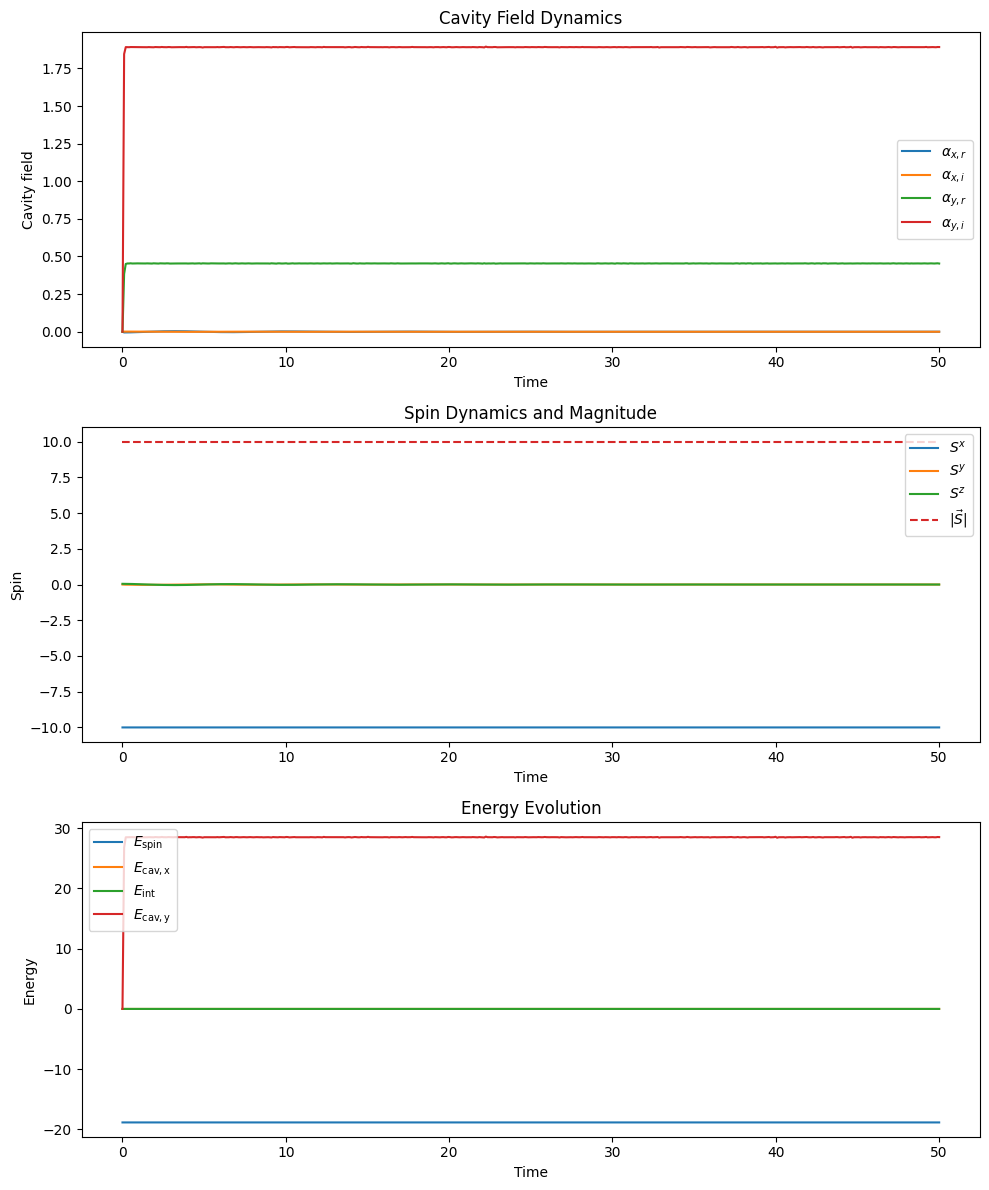

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters (in MHz and us)
delta = -2*np.pi*1.2       # detuning
kappa = 2*np.pi*1.0       # cavity decay rate
omega_L = 2*np.pi*0.3     # Larmor frequency
g_eff = -2*np.pi*0.5     # effective coupling = Omega_Rabi*g / (3*Delta)
N_spin = 20                  # number of spin-1/2 particles

######################## Atomic decay on/off ########################
# Atomic decay parameters
Gamma = 2*np.pi*6.0 *0        # 5P decay rate
# Gamma = 0       # turn off atomic decay for this simulation
#####################################################################
Delta = -2*np.pi*80.0  # detuning from probe laser to atomic transition
g_max = 2*np.pi*3  # maximum coupling strength
Omega_rabi = 3*Delta*g_eff / (g_max*2)
chi = 0*4* g_max**2 /(3*Delta)    # cavity birefringence




# Define the system of ODEs
def dynamics(t, y):
    alpha_xr, alpha_xi, alpha_yr, alpha_yi, Sx, Sy, Sz = y

    # Compute Δn
    delta_n = 2 * (alpha_xr * alpha_yi - alpha_xi * alpha_yr)

    # compute decay rates
    gamma_p = (Gamma / (18 * Delta**2)) * (Omega_rabi**2 + 8 * g_max* Omega_rabi * alpha_yr + 4 * g_max**2 * (alpha_xi**2+alpha_xr**2+alpha_yi**2+alpha_yr**2))
    gamma_s = 6 * gamma_p
    Gamma_op = (2 * Gamma / (9 * Delta**2)) * g_max * (Omega_rabi * alpha_xi - g_max * delta_n)

    # Photon quadrature equations
    dalpha_xr_dt = -delta * alpha_xi - (kappa / 2) * alpha_xr + g_eff * Sz + chi * Sz * alpha_yr
    dalpha_xi_dt = delta * alpha_xr - (kappa / 2) * alpha_xi + chi * Sz * alpha_yi
    dalpha_yr_dt = -delta * alpha_yi - (kappa / 2) * alpha_yr - chi * Sz * alpha_xr
    dalpha_yi_dt = -N_spin * g_eff + delta * alpha_yr - (kappa / 2) * alpha_yi - chi * Sz * alpha_xi


    # Spin equations
    dSx_dt = -2 * g_eff * alpha_xi * Sy + chi * delta_n * Sy  - gamma_s * Sx
    dSy_dt =  2 * g_eff * alpha_xi * Sx - omega_L * Sz - chi * delta_n * Sx  - gamma_s * Sy
    dSz_dt = omega_L * Sy   + Gamma_op * (N_spin/2) - gamma_p * Sz

    return [
        dalpha_xr_dt, dalpha_xi_dt,
        dalpha_yr_dt, dalpha_yi_dt,
        dSx_dt, dSy_dt, dSz_dt
    ]


# Initial conditions
alpha_xr0 = 0.0
alpha_xi0 = 0.0
alpha_yr0 = 0.0
alpha_yi0 = 0.0
Sx0 = -N_spin / 2
Sy0 = 0.0
Sz0 = 0.05  # small deviation from full polarization

y0 = [alpha_xr0, alpha_xi0, alpha_yr0, alpha_yi0, Sx0, Sy0, Sz0]

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 500)

# Solve ODE
sol = solve_ivp(dynamics, t_span, y0, t_eval=t_eval, method='RK45')
t = sol.t
alpha_xr, alpha_xi, alpha_yr, alpha_yi, Sx, Sy, Sz = sol.y

# Derived quantities
S_mag = np.sqrt(Sx**2 + Sy**2 + Sz**2)

# Energies
E_spin = omega_L * Sx
E_cav_x = -delta * (alpha_xr**2 + alpha_xi**2 )
E_cav_y = -delta * (alpha_yr**2 + alpha_yi**2)
E_int = 2 * g_eff * Sz * alpha_xi  # interaction via a_x only

# Plotting
plt.figure(figsize=(10, 12))

# 1. Cavity field components
plt.subplot(3, 1, 1)
plt.plot(t, alpha_xr, label=r'$\alpha_{x,r}$')
plt.plot(t, alpha_xi, label=r'$\alpha_{x,i}$')
plt.plot(t, alpha_yr, label=r'$\alpha_{y,r}$')
plt.plot(t, alpha_yi, label=r'$\alpha_{y,i}$')
plt.xlabel('Time')
plt.ylabel('Cavity field')
plt.title('Cavity Field Dynamics')
plt.legend()

# 2. Spin components and magnitude
plt.subplot(3, 1, 2)
plt.plot(t, Sx, label=r'$S^x$')
plt.plot(t, Sy, label=r'$S^y$')
plt.plot(t, Sz, label=r'$S^z$')
plt.plot(t, S_mag, '--', label=r'$|\vec{S}|$')
plt.xlabel('Time')
plt.ylabel('Spin')
plt.title('Spin Dynamics and Magnitude')
plt.legend()

# 3. Energy components
plt.subplot(3, 1, 3)
plt.plot(t, E_spin, label=r'$E_\mathrm{spin}$')
plt.plot(t, E_cav_x, label=r'$E_\mathrm{cav,x}$')
plt.plot(t, E_int, label=r'$E_\mathrm{int}$')
plt.plot(t, E_cav_y, label=r'$E_\mathrm{cav,y}$')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Evolution')
plt.legend()

plt.tight_layout()
plt.show()

Omega_rabi = 3.6 MHz
g_max = 3.0 MHz
Omega_rabi / g_max = 1.2


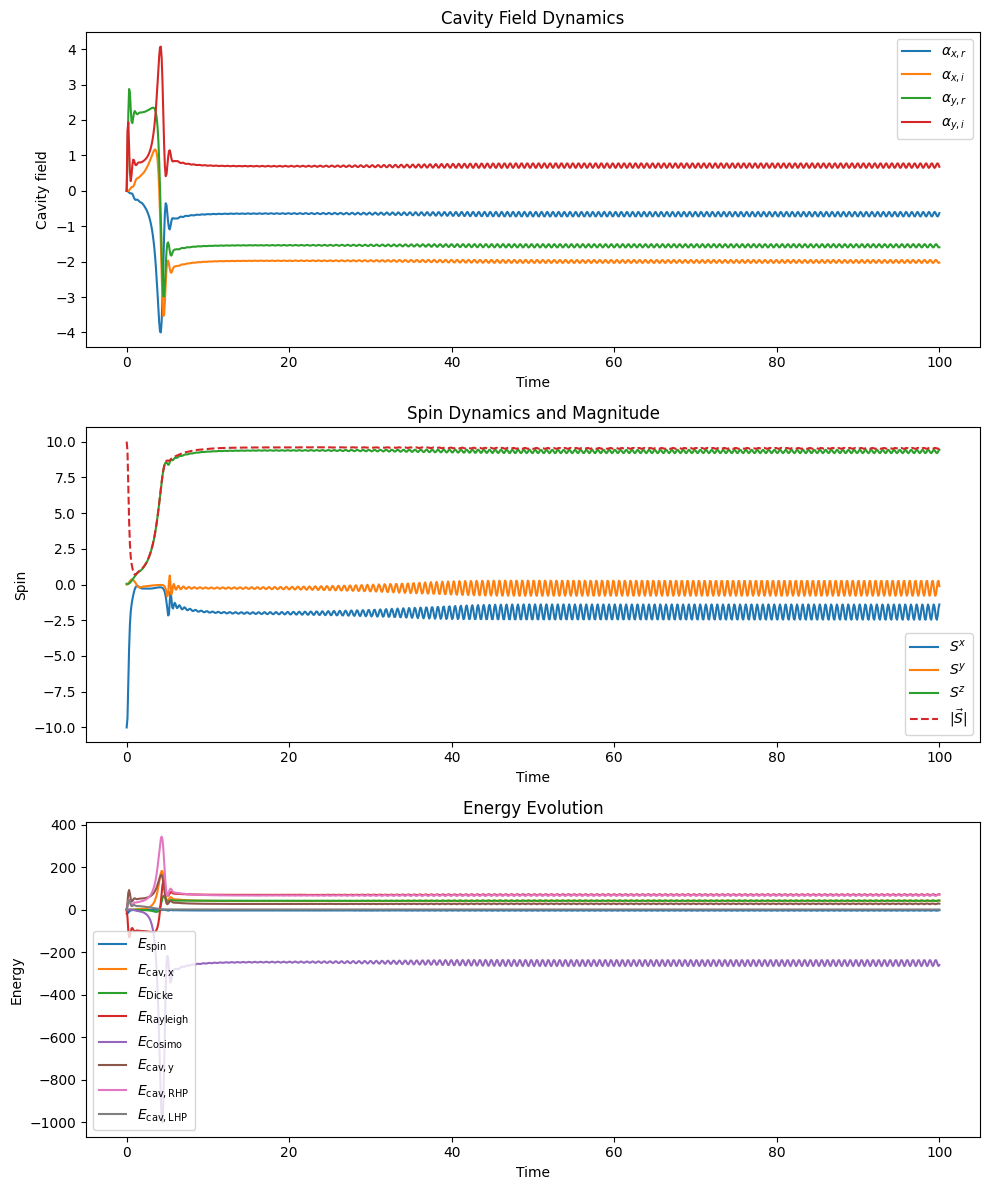

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters (in MHz and us)
delta = -2*np.pi*1.5       # detuning
kappa = 2*np.pi*1.0       # cavity decay rate
omega_L = 2*np.pi*0.3     # Larmor frequency
g_eff = -2*np.pi*0.18      # effective coupling = Omega_Rabi*g / (3*Delta)
N_spin = 20                  # number of spin-1/2 particles

######################## Atomic decay on/off ########################
# Atomic decay parameters
Gamma = 2*np.pi*6.0       # 5P decay rate
# Gamma = 0       # turn off atomic decay for this simulation
#####################################################################
Delta = -2*np.pi*40.0  # detuning from probe laser to atomic transition
g_max = 2*np.pi*3  # maximum coupling strength
Omega_rabi = 3*Delta*g_eff / (g_max*2)
chi =  4* g_max**2 /(3*Delta)     # cavity birefringence

print(f"Omega_rabi = {Omega_rabi/(2*np.pi)} MHz")
print(f"g_max = {g_max/(2*np.pi)} MHz")
print(f"Omega_rabi / g_max = {Omega_rabi/g_max}")


print(f"Omega_rabi = {Omega_rabi/(2*np.pi)} MHz")
print(f"g_max = {g_max/(2*np.pi)} MHz")
print(f"Omega_rabi / g_max = {Omega_rabi/g_max}")
# Define the system of ODEs
def dynamics(t, y):
    alpha_xr, alpha_xi, alpha_yr, alpha_yi, Sx, Sy, Sz = y

    # Compute Δn
    delta_n = 2 * (alpha_xr * alpha_yi - alpha_xi * alpha_yr)

    # compute decay rates
    gamma_p = (Gamma / (18 * Delta**2)) * (Omega_rabi**2 + 8 * g_max* Omega_rabi * alpha_yr + 4 * g_max**2 * (alpha_xi**2+alpha_xr**2+alpha_yi**2+alpha_yr**2))
    gamma_s = 6 * gamma_p
    Gamma_op = (2 * Gamma / (9 * Delta**2)) * g_max * (Omega_rabi * alpha_xi - g_max * delta_n)

    # Photon quadrature equations
    dalpha_xr_dt = -delta * alpha_xi - (kappa / 2) * alpha_xr + g_eff * Sz + chi * Sz * alpha_yr
    dalpha_xi_dt = delta * alpha_xr - (kappa / 2) * alpha_xi + chi * Sz * alpha_yi
    dalpha_yr_dt = -delta * alpha_yi - (kappa / 2) * alpha_yr - chi * Sz * alpha_xr
    dalpha_yi_dt = -N_spin * g_eff + delta * alpha_yr - (kappa / 2) * alpha_yi - chi * Sz * alpha_xi
    # dalpha_yr_dt = 0
    # dalpha_yi_dt = 0


    # Spin equations
    dSx_dt = -2 * g_eff * alpha_xi * Sy + chi * delta_n * Sy  - gamma_s * Sx
    dSy_dt =  2 * g_eff * alpha_xi * Sx - omega_L * Sz - chi * delta_n * Sx  - gamma_s * Sy
    dSz_dt = omega_L * Sy   + Gamma_op * (N_spin/2) - gamma_p * Sz

    return [
        dalpha_xr_dt, dalpha_xi_dt,
        dalpha_yr_dt, dalpha_yi_dt,
        dSx_dt, dSy_dt, dSz_dt
    ]


# Initial conditions
alpha_xr0 = 0.0
alpha_xi0 = 0.0
alpha_yr0 = 0.0
alpha_yi0 = 0.0
Sx0 = -N_spin / 2
Sy0 = 0.0
Sz0 = 0.05  # small deviation from full polarization

y0 = [alpha_xr0, alpha_xi0, alpha_yr0, alpha_yi0, Sx0, Sy0, Sz0]

# Time span
t_span = (0, 100)
t_eval = np.linspace(*t_span, 1000)

# Solve ODE
sol = solve_ivp(dynamics, t_span, y0, t_eval=t_eval, method='RK45'
                ,rtol=1e-5,            # tighten relative tolerance
                atol=1e-7,           # tighten absolute tolerance
                max_step=0.01        # maximum step size in time units
                )
t = sol.t
alpha_xr, alpha_xi, alpha_yr, alpha_yi, Sx, Sy, Sz = sol.y

# Derived quantities
S_mag = np.sqrt(Sx**2 + Sy**2 + Sz**2)

# Compute circular polarizations from cartesian modes
a_x = alpha_xr + 1j * alpha_xi
a_y = alpha_yr + 1j * alpha_yi
a_R = (a_y - 1j * a_x) / np.sqrt(2)
a_L = (a_y + 1j * a_x) / np.sqrt(2)

# Energies in polarization basis
E_R = -delta * np.abs(a_R)**2
E_L = -delta * np.abs(a_L)**2

# Energies
E_spin = omega_L * Sx
E_cav_x = -delta * (alpha_xr**2 + alpha_xi**2 )
E_cav_y = -delta * (alpha_yr**2 + alpha_yi**2)
E_int_dicke = 2 * g_eff * Sz * alpha_xi  # interaction via a_x only
E_int_rayleigh = 2 * g_eff * N_spin * alpha_yr  # interaction via a_y only

delta_n = 2 * (alpha_xr * alpha_yi - alpha_xi * alpha_yr)
E_int_cosimo = -2 * chi * Sz * delta_n  # interaction via cavity resonance shift

# Plotting
plt.figure(figsize=(10, 12))

# 1. Cavity field components
plt.subplot(3, 1, 1)
plt.plot(t, alpha_xr, label=r'$\alpha_{x,r}$')
plt.plot(t, alpha_xi, label=r'$\alpha_{x,i}$')
plt.plot(t, alpha_yr, label=r'$\alpha_{y,r}$')
plt.plot(t, alpha_yi, label=r'$\alpha_{y,i}$')
plt.xlabel('Time')
plt.ylabel('Cavity field')
plt.title('Cavity Field Dynamics')
plt.legend()

# 2. Spin components and magnitude
plt.subplot(3, 1, 2)
plt.plot(t, Sx, label=r'$S^x$')
plt.plot(t, Sy, label=r'$S^y$')
plt.plot(t, Sz, label=r'$S^z$')
plt.plot(t, S_mag, '--', label=r'$|\vec{S}|$')
plt.xlabel('Time')
plt.ylabel('Spin')
plt.title('Spin Dynamics and Magnitude')
plt.legend()

# 3. Energy components
plt.subplot(3, 1, 3)
plt.plot(t, E_spin, label=r'$E_\mathrm{spin}$')
plt.plot(t, E_cav_x, label=r'$E_\mathrm{cav,x}$')
plt.plot(t, E_int_dicke, label=r'$E_\mathrm{Dicke}$')
plt.plot(t, E_int_rayleigh, label=r'$E_\mathrm{Rayleigh}$')
plt.plot(t, E_int_cosimo, label=r'$E_\mathrm{Cosimo}$')
plt.plot(t, E_cav_y, label=r'$E_\mathrm{cav,y}$')
plt.plot(t, E_R, label=r'$E_\mathrm{cav,RHP}$')
plt.plot(t, E_L, label=r'$E_\mathrm{cav,LHP}$')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Evolution')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
print(alpha_xr[-1])
print(alpha_xi[-1])
print(alpha_yr[-1])
print(alpha_yi[-1])


6.253555931059869e-05
-0.00046228233295570354
-3.333461894399065
0.00012977229946727043


In [24]:
a_L[-1]

np.complex128(-2.3567866273840776+0.00013598219101729618j)

#### code to show bifurcation

Many trajectories with the initial condition of a vacuum cavity field, and a random collective spin (all spins are polarized collectively in a random direction). 

## Equations of motion in the incoherent limit

---

The system can be approximated as the direct-product state of individual classical spins in the incoherent regime, where the local depumping/pumping kills any atom-atom correlation before they can build up. In this section we will write down the equation of motion in this limit while also treating the cavity field as classical. 

Since this is the limit where things are as classical as they can be, there's no need for a quantum treatment. However, there are two parallel approaches one can take: 
1. The essemble average approach. Here we allow the individual spins to shrink in length, so that dephasing and depolarization can be modeled as a weaker magnet. This is kind of like the classical version of the Master equation. 
2. The stochastic trajectories approach. Here we enforce the spins to stay spin-1/2 in length but optical pumping (and depumping) is modeled as stochastic jumps. 

---


rewrite Hamiltonian in the aR, aL basis:

$$ H = -\delta  (n_R+n_L) + \chi (\sum_n s_n^z) (n_R-n_L)  + \sum_n \left[ (\omega_L s_n^x) +g_\text{eff} s_n^z (-i a_x + i a_x^\dagger) +g_\text{eff} ( a_y +  a_y^\dagger)  \right],$$
$$ H = -\delta  (n_x+n_y) + \chi (\sum_n s_n^z)\; i(a_x^\dagger a_y - a_y^\dagger a_x)  + \sum_n \left[ (\omega_L s_n^x) +g_\text{eff} s_n^z (-i a_x + i a_x^\dagger) +g_\text{eff} ( a_y +  a_y^\dagger)  \right],$$

$$ \text{where}
\left\{
    \begin{aligned}
    g_\text{eff} &= \frac{2}{3}\frac{g \Omega}{\Delta}  \quad\times (-1)^n \text{ if half-integer spaced}\\
    \chi &= \frac{4}{3}\frac{g^2}{\Delta}
    \end{aligned}
    \right.
     $$


Let's rewrite the Master equation in this regime:

$$ H = -\delta  a_x^\dagger a_x + \sum_n \left[ \omega_L s_n^x  +g_\text{eff} s_n^z (i a_x^\dagger -i a_x)  \right], \quad \text{where}\; g_\text{eff} = \frac{1}{3}\frac{g \Omega}{\Delta}$$

$$
\begin{aligned}
L^{(n)}_{\frac{1}{2}\leftarrow\frac{-1}{2}} &\simeq \frac{\sqrt{\Gamma}}{3\sqrt{2} \Delta} \left(\Omega +2 g \, \textbf{Im}(a_x) \right) \ket{\frac{1}{2}}^{(n)}\bra{\frac{-1}{2}}^{(n)} \\
L^{(n)}_{\frac{-1}{2}\leftarrow\frac{1}{2}} &\simeq \frac{\sqrt{\Gamma}}{3\sqrt{2} \Delta}  \left(\Omega -2 g \, \textbf{Im}(a_x) \right) \ket{\frac{-1}{2}}^{(n)}\bra{\frac{1}{2}}^{(n)}\\
L^{(n)}_{\frac{1}{2}\leftarrow\frac{1}{2}} &\simeq \frac{\sqrt{5 \Gamma}}{3\sqrt{2} \Delta} \left(\Omega +\frac{8}{5} g \, \textbf{Im}(a_x) \right) \ket{\frac{1}{2}}^{(n)}\bra{\frac{1}{2}}^{(n)} \\
L^{(n)}_{\frac{-1}{2}\leftarrow\frac{-1}{2}} &\simeq \frac{\sqrt{5 \Gamma}}{3\sqrt{2} \Delta} \left(\Omega -\frac{8}{5} g \, \textbf{Im}(a_x) \right) \ket{\frac{-1}{2}}^{(n)}\bra{\frac{-1}{2}}^{(n)} \\
L_\text{cav} &= \sqrt{\kappa}\, a_x
\end{aligned}
$$


$$
\begin{aligned}
\frac{d\rho}{dt} = -i \left[-\delta  a_x^\dagger a_x + \sum_n \left( \omega_L s_n^x  +g_\text{eff} s_n^z (i a_x^\dagger -i a_x)  \right), \rho \right] + \kappa \left( a_x \rho a_x^\dagger - \frac{1}{2} \left\{ a_x^\dagger a_x, \rho \right\} \right) \\
+ \sum_n \left[ A_+ \left( \sigma_n^+ \rho \sigma_n^- - \frac{1}{2} \left\{ P_n^{\downarrow}, \rho \right\} \right)
+  A_- \left( \sigma_n^- \rho \sigma_n^+ - \frac{1}{2} \left\{ P_n^{\uparrow}, \rho \right\} \right) \right.\\
\left. + B_+ \left( P_n^{\uparrow} \rho P_n^{\uparrow} - \frac{1}{2} \left\{ P_n^{\uparrow}, \rho \right\} \right)
+ B_- \left( P_n^{\downarrow} \rho P_n^{\downarrow} - \frac{1}{2} \left\{ P_n^{\downarrow}, \rho \right\} \right) \right]\\
\end{aligned}
$$

Where:

$$
A_{\pm} = \frac{\Gamma}{18 \Delta^2} \left( \Omega \pm 2g\, \text{Im}(\alpha_x) \right)^2,\quad
B_{\pm} = \frac{5\Gamma}{18 \Delta^2} \left( \Omega \pm \tfrac{8}{5}g\, \text{Im}(\alpha_x) \right)^2
$$

The first line represents coherent evolution (and incoherent cavity dissipation); the second line represents individual spin level optical pump and depumping (the inbalance of the two terms leads to directional optical pumping); the third line represents individual spin level dephasing. $\rho$ is a $2^N \times M$ dimensional tensor, where $M$ is the truncated Fock state basis dimension of the cavity. 

### ensemble averageed classic individual spin in classical cavity (incoherent regime) 

---

This is assuming that each individual spin can be treated as a classical spin with length $0< s_i \leq 1/2$. Decay operators will result in shortening of these spin lengths. This is the essemble average approach mentioned above. 

Similar to the coherent regime, we can write out the equations of motion for expectation values, in the mean-field approximation way:


$$
\left\{
\begin{aligned}
\frac{d\alpha_r}{dt} &= \delta\, \alpha_i - \frac{\kappa}{2} \alpha_r - g_{\text{eff}} \sum_{n=1}^{N} s_n^z\\
\frac{d\alpha_i}{dt} &= -\delta\, \alpha_r - \frac{\kappa}{2} \alpha_i  \\
\frac{ds_n^x}{dt} &= -2g_{\text{eff}} \alpha_i s_n^y - \gamma_s(\alpha_i) s_n^x \\
\frac{ds_n^y}{dt} &= 2g_{\text{eff}} \alpha_i s_n^x - \omega_L s_n^z - \gamma_s(\alpha_i) s_n^y \\
\frac{ds_n^z}{dt} &= \omega_L s_n^y + \Gamma_{op}(\alpha_i) - \gamma_p(\alpha_i) s_n^z
\end{aligned}
\right.
$$

Where,
$$
\left\{
\begin{aligned}
\gamma_s(\alpha_i) &= \frac{\Gamma}{18 \Delta^2} \left( 6 \Omega^2 + \frac{84}{5} g^2 \alpha_i^2 \right)\\
\gamma_p(\alpha_i) &= \frac{\Gamma}{18 \Delta^2} \left( \Omega^2 + 4 g^2 \alpha_i^2 \right)\\
\Gamma_{\text{op}}(\alpha_i) &= \frac{4 \Gamma g \Omega}{9 \Delta^2} \alpha_i
\end{aligned}
\right.
$$

---
**Important realization**


This method is no good. If we look at the equations of motion above, when initalized in the symmetric state, the system evolves the same way as the "total classical spin". The physical interpretation is that ensemble average averages out any bifurcation behavior.

#### code to show cavity cooling-heating

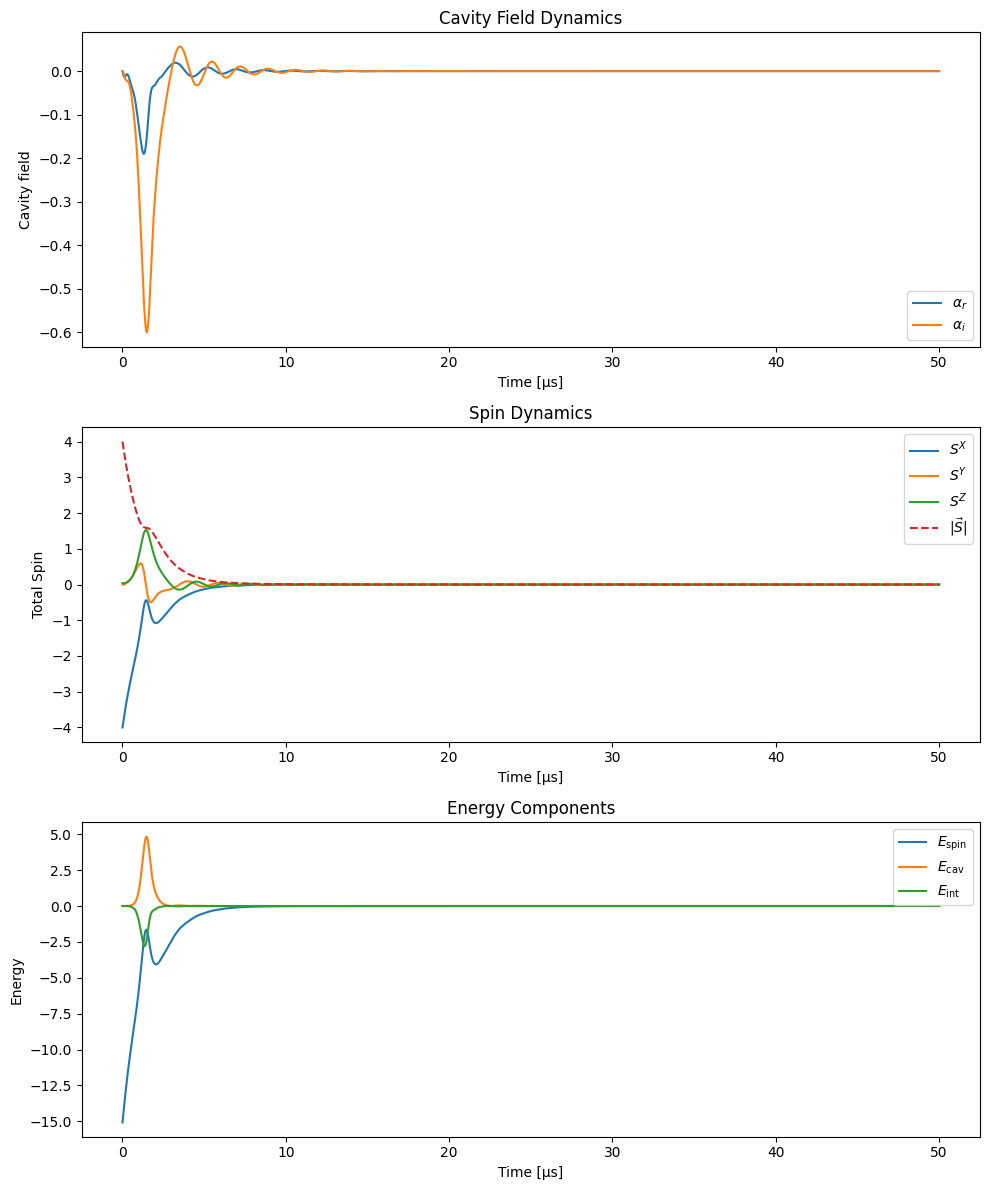

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters (in MHz and us)
delta = -2*np.pi*2.0       # detuning
kappa = 2*np.pi*1.0       # cavity decay rate
omega_L = 2*np.pi*0.6     # Larmor frequency
g_eff = 2*np.pi*0.8      # effective coupling = Omega_Rabi*g / (3*Delta)
N_spin = 8                # number of spin-1/2 particles

######################## Atomic decay on/off ########################
# Atomic decay parameters
# Gamma = 2*np.pi*6.0       # 5P decay rate
Gamma = 2*np.pi*6.0 /10      # 1/10 5P decay rate
# Gamma = 0       # turn off atomic decay for this simulation
#####################################################################
Delta = -2*np.pi*80.0  # detuning from probe laser to atomic transition
g_max = 2*np.pi*3  # maximum coupling strength
Omega_rabi = 3*Delta*g_eff / g_max




# ODE system
def dynamics(t, y):
    alpha_r, alpha_i = y[0], y[1]
    s_all = y[2:].reshape(N_spin, 3)  # shape (N_spin, 3)

    # Dissipation rates (functions of alpha_i)
    gamma_s = (Gamma / (18 * Delta**2)) * (6 * Omega_rabi**2 + (84 / 5) * g_max**2 * alpha_i**2)
    gamma_p = (Gamma / (18 * Delta**2)) * (Omega_rabi**2 + 4 * g_max**2 * alpha_i**2)
    Gamma_op = (4 * Gamma / (9 * Delta**2)) * g_max * Omega_rabi * alpha_i

    Sz_total = np.sum(s_all[:, 2])  # total Sz for field evolution

    # Cavity dynamics
    dalpha_r_dt = delta * alpha_i - (kappa / 2) * alpha_r - g_eff * Sz_total
    dalpha_i_dt = -delta * alpha_r - (kappa / 2) * alpha_i 

    # Spin dynamics for each spin
    ds_dt = np.zeros_like(s_all)
    for n in range(N_spin):
        sx, sy, sz = s_all[n]
        dsx = -2 * g_eff * alpha_i * sy - gamma_s * sx
        dsy =  2 * g_eff * alpha_i * sx - omega_L * sz - gamma_s * sy
        dsz =  omega_L * sy + Gamma_op - gamma_p * sz
        ds_dt[n] = [dsx, dsy, dsz]

    return np.concatenate(([dalpha_r_dt, dalpha_i_dt], ds_dt.flatten()))

alpha_r0 = 0.0
alpha_i0 = 0.0

# Initial state: spins aligned -x
Sx0 = np.full(N_spin, -0.5)
Sy0 = np.zeros(N_spin)
Sz0 = np.full(N_spin, 0.005)
# # Initial state: spins aligned +z
# Sx0 = np.full(N_spin, 0.)
# Sy0 = np.zeros(N_spin)
# Sz0 = np.full(N_spin, 0.5)

# Initial conditions: each spin is random, |s| = 1/2
# rng = np.random.default_rng(seed=0)
# theta = np.arccos(2 * rng.random(N_spin) - 1)
# phi = 2 * np.pi * rng.random(N_spin)

# Sx0 = 0.5 * np.sin(theta) * np.cos(phi)
# Sy0 = 0.5 * np.sin(theta) * np.sin(phi)
# Sz0 = 0.5 * np.cos(theta)


y0 = np.concatenate(([alpha_r0, alpha_i0], np.stack([Sx0, Sy0, Sz0], axis=1).flatten()))

# Time setup
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Solve
sol = solve_ivp(dynamics, t_span, y0, t_eval=t_eval, method='RK45')
t = sol.t
alpha_r, alpha_i = sol.y[0], sol.y[1]
Sx_all = sol.y[2::3].T
Sy_all = sol.y[3::3].T
Sz_all = sol.y[4::3].T

Sx, Sy, Sz = np.sum(Sx_all, axis=1), np.sum(Sy_all, axis=1), np.sum(Sz_all, axis=1)
S_mag = np.sqrt(Sx**2 + Sy**2 + Sz**2)

# Energies
E_spin = omega_L * Sx
E_cav = -delta * (alpha_r**2 + alpha_i**2)
E_int = 2 * g_eff * Sz * alpha_r

# Plot
plt.figure(figsize=(10, 12))

# Cavity fields
plt.subplot(3, 1, 1)
plt.plot(t, alpha_r, label=r'$\alpha_r$')
plt.plot(t, alpha_i, label=r'$\alpha_i$')
plt.xlabel('Time [µs]')
plt.ylabel('Cavity field')
plt.title('Cavity Field Dynamics')
plt.legend()

# Spin components
plt.subplot(3, 1, 2)
plt.plot(t, Sx, label=r'$S^x$')
plt.plot(t, Sy, label=r'$S^y$')
plt.plot(t, Sz, label=r'$S^z$')
plt.plot(t, S_mag, '--', label=r'$|\vec{S}|$')
plt.xlabel('Time [µs]')
plt.ylabel('Total Spin')
plt.title('Spin Dynamics')
plt.legend()

# Energy
plt.subplot(3, 1, 3)
plt.plot(t, E_spin, label=r'$E_{\mathrm{spin}}$')
plt.plot(t, E_cav, label=r'$E_{\mathrm{cav}}$')
plt.plot(t, E_int, label=r'$E_{\mathrm{int}}$')
plt.xlabel('Time [µs]')
plt.ylabel('Energy')
plt.title('Energy Components')
plt.legend()

plt.tight_layout()
plt.show()


### stocastic classic individual spin in classical cavity (incoherent regime) 

This is assuming that each individual spin can be treated as a classical spin with length $s_i = 1/2$. Decay operators will result in random reset of spins/cavity mode. This is the stochastic trajectories approach mentioned above.

(To be completed): classical Heisenberg–Langevin Equations.

## quantum spins in a classical cavity (intermediate regime)

---

In this approach, the cavity field is treated as a varying parameter in the time-varying schrodinger's equation. It is then updated during the solving of the SSE or ME, as a self-consistent field. 


---

Let's rewrite the Master equation in this regime:

$$
\begin{aligned}
\frac{d\rho}{dt} = -i \left[-\delta  a_x^\dagger a_x + \sum_n \left( \omega_L s_n^x  +g_\text{eff} s_n^z (i a_x^\dagger -i a_x)  \right), \rho \right] + \kappa \left( a_x \rho a_x^\dagger - \frac{1}{2} \left\{ a_x^\dagger a_x, \rho \right\} \right) \\
+ \sum_n \left[ A_+ \left( \sigma_n^+ \rho \sigma_n^- - \frac{1}{2} \left\{ P_n^{\downarrow}, \rho \right\} \right)
+  A_- \left( \sigma_n^- \rho \sigma_n^+ - \frac{1}{2} \left\{ P_n^{\uparrow}, \rho \right\} \right) \right.\\
\left. + B_+ \left( P_n^{\uparrow} \rho P_n^{\uparrow} - \frac{1}{2} \left\{ P_n^{\uparrow}, \rho \right\} \right)
+ B_- \left( P_n^{\downarrow} \rho P_n^{\downarrow} - \frac{1}{2} \left\{ P_n^{\downarrow}, \rho \right\} \right) \right]\\
\end{aligned}
$$

Where:

$$
A_{\pm} = \frac{\Gamma}{18 \Delta^2} \left( \Omega \pm 2g\, \text{Im}(\alpha_x) \right)^2,\quad
B_{\pm} = \frac{5\Gamma}{18 \Delta^2} \left( \Omega \pm \tfrac{8}{5}g\, \text{Im}(\alpha_x) \right)^2
$$

The first line represents coherent evolution (and incoherent cavity dissipation); the second line represents individual spin level optical pump and depumping (the inbalance of the two terms leads to directional optical pumping); the third line represents individual spin level dephasing. $\rho$ is a $2^N$ dimensional tensor, where the cavity field is treated as a c-number. 

(Note: I tried a few programming approaches, and the parallelized torch code is the fastest. evaluating N=10 takes about 20 minutes.)

#### Code to show single trajectory with cavity cooling + optical (de)pumping

---
Vary Gamma to tune the strength of OP.

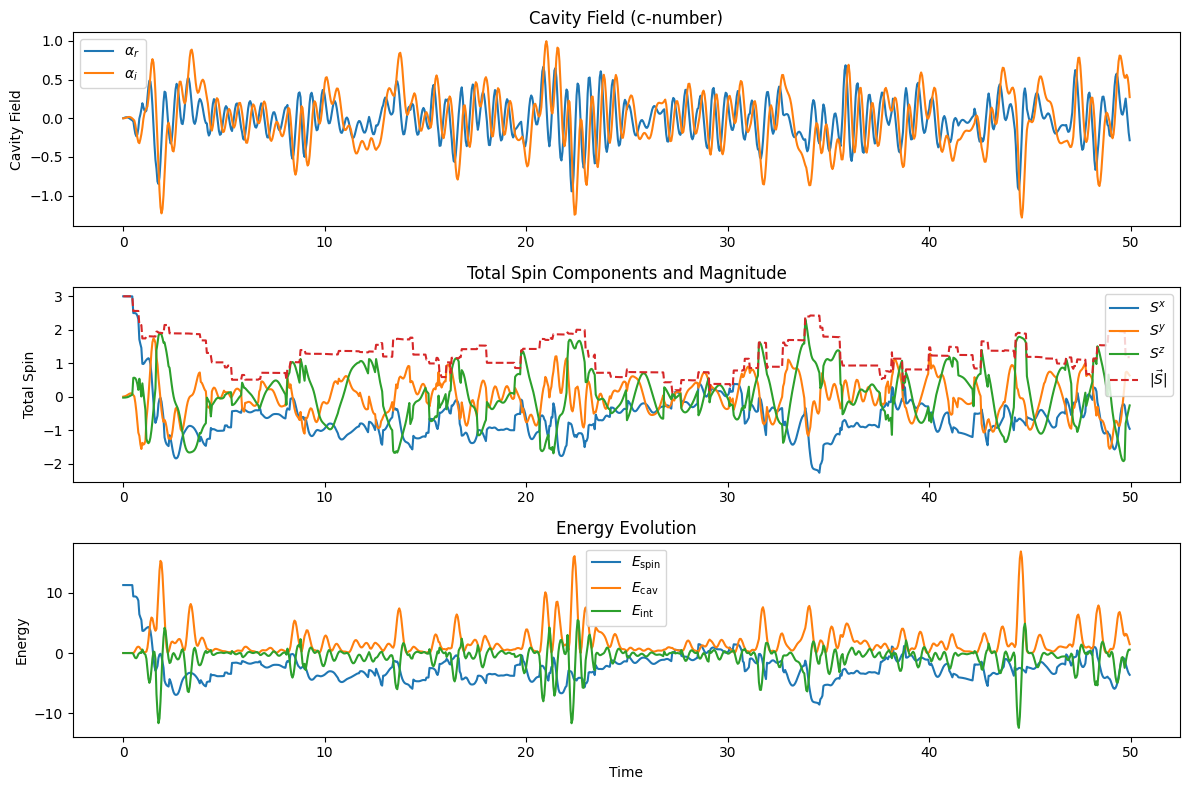

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qtp

# System parameters
delta = -2 * np.pi * 1.5     # Cavity detuning
kappa = 2 * np.pi * 1.0      # Cavity decay rate
omega_L = 2 * np.pi * 0.6    # Larmor frequency
########################################################
# Gamma = 0    # Spontaneous emission rate
Gamma = 2 * np.pi * 6.0  /10    # Spontaneous emission rate
# Gamma = 2 * np.pi * 6.0      # Spontaneous emission rate
########################################################
Delta = -2 * np.pi * 80.0    # Laser detuning
g = 2 * np.pi * 3.0          # Single-photon coupling
g_eff = 2 * np.pi * 0.6      # Effective coupling
N = 6                       # Number of spins
Omega = 3 * Delta * g_eff / g  # Implied by g_eff = Omega * g / (3Δ)

# Time grid
t_max = 50
dt = 0.05
times = np.arange(0, t_max, dt)

# Operators
sx = qtp.sigmax()/2
sy = qtp.sigmay()/2
sz = qtp.sigmaz()/2
sp = qtp.sigmap()
sm = qtp.sigmam()
I2 = qtp.qeye(2)

# Basis and identity operators
ops = {
    'sx': [], 'sy': [], 'sz': [], 'sp': [], 'sm': [],
    'Pup': [], 'Pdown': []
}
for i in range(N):
    op_list = lambda op: [op if j == i else I2 for j in range(N)]
    ops['sx'].append(qtp.tensor(*op_list(sx)))
    ops['sy'].append(qtp.tensor(*op_list(sy)))
    ops['sz'].append(qtp.tensor(*op_list(sz)))
    ops['sp'].append(qtp.tensor(*op_list(sp)))
    ops['sm'].append(qtp.tensor(*op_list(sm)))
    ops['Pup'].append(qtp.tensor(*op_list((I2 + 2*sz)/2)))
    ops['Pdown'].append(qtp.tensor(*op_list((I2 - 2*sz)/2)))

# Initial state: all spins near σx = +1/2 eigenstate
########################################
# Spin-1/2 with Sx ≈ 0.5 - ε and Sz = 0.005
# epsilon = 0.01
# sx_target = 0.5 - epsilon        # in spin units
# sz_target = 0.005
# sx_sigma = 2 * sx_target         # because Sx = ½ σx
# sz_sigma = 2 * sz_target         # because Sz = ½ σz

# # Step 1: Determine theta
# theta = np.arccos(sz_sigma)

# # Step 2: Determine phi
# sin_theta = np.sin(theta)
# cos_phi = sx_sigma / sin_theta
# phi = np.arccos(np.clip(cos_phi, -1, 1))  # clip for safety


theta = np.pi/2 + 0.01
phi = 0.0  # Set phi to zero for simplicity

# Step 3: Construct spinor
psi0 = np.cos(theta / 2) * qtp.basis(2, 0) + np.sin(theta / 2) * np.exp(1j * phi) * qtp.basis(2, 1)

# psi0 = qtp.basis(2, 0) 

######################################
psi_list = [psi0.unit() for _ in range(N)]
psi = qtp.tensor(psi_list)

# Storage
alpha_r_list, alpha_i_list = [], []
Sx_list, Sy_list, Sz_list = [], [], []

# Initial cavity field
alpha_r = 0.0
alpha_i = 0.0

# Evolution loop
for t in times:
    # Measure spin observables
    Sx = sum([(psi.dag() * op * psi).real for op in ops['sx']])
    Sy = sum([(psi.dag() * op * psi).real for op in ops['sy']])
    Sz = sum([(psi.dag() * op * psi).real for op in ops['sz']])

    # Store observables
    alpha_r_list.append(alpha_r)
    alpha_i_list.append(alpha_i)
    Sx_list.append(Sx)
    Sy_list.append(Sy)
    Sz_list.append(Sz)

    # Update cavity field classically (Euler)
    dalpha_r = delta * alpha_i - (kappa / 2) * alpha_r - g_eff * Sz
    dalpha_i = -delta * alpha_r - (kappa / 2) * alpha_i #+ g_eff * Sz
    alpha_r += dalpha_r * dt
    alpha_i += dalpha_i * dt

    # Update dissipative rates
    Ai = alpha_i
    A_plus = (Gamma / (18 * Delta**2)) * (Omega + 2 * g * Ai)**2
    A_minus = (Gamma / (18 * Delta**2)) * (Omega - 2 * g * Ai)**2
    B_plus = (5 * Gamma / (18 * Delta**2)) * (Omega + (8/5) * g * Ai)**2
    B_minus = (5 * Gamma / (18 * Delta**2)) * (Omega - (8/5) * g * Ai)**2

    # Construct collapse operators
    C_ops = []
    for n in range(N):
        C_ops += [
            np.sqrt(A_plus) * ops['sp'][n],
            np.sqrt(A_minus) * ops['sm'][n],
            np.sqrt(B_plus) * ops['Pup'][n],
            np.sqrt(B_minus) * ops['Pdown'][n]
        ]

    # Deterministic evolution (non-Hermitian effective Hamiltonian)
    # Initialize the deterministic Hamiltonian as zero operator
    H_det = 0 * ops['sx'][0]

    for n in range(N):
        H_det +=  omega_L * ops['sx'][n] + 2 * g_eff * alpha_i * ops['sz'][n]


    H_eff = H_det - (1j / 2) * sum([c.dag() * c for c in C_ops])

    # Evolve state
    
    # identity = qtp.tensor([I2] * N)
    # psi = (identity - 1j * H_eff * dt) * psi
    psi = (H_eff * (-1j * dt)).expm() * psi

    psi = psi.unit()

    # Stochastic jumps
    for c in C_ops:
        p_jump = (dt * (psi.dag() * c.dag() * c * psi)).real
        if np.random.rand() < p_jump:
            psi = (c * psi).unit()

# Plotting
t_array = times
plt.figure(figsize=(12, 8))


# 1. Cavity field
plt.subplot(3, 1, 1)
plt.plot(t_array, alpha_r_list, label=r'$\alpha_r$')
plt.plot(t_array, alpha_i_list, label=r'$\alpha_i$')
plt.ylabel('Cavity Field')
plt.legend()
plt.title("Cavity Field (c-number)")

# 2. Spin expectation values and magnitude
plt.subplot(3, 1, 2)
plt.plot(t_array, Sx_list, label=r'$S^x$')
plt.plot(t_array, Sy_list, label=r'$S^y$')
plt.plot(t_array, Sz_list, label=r'$S^z$')
S_mag = np.sqrt(np.array(Sx_list)**2 + np.array(Sy_list)**2 + np.array(Sz_list)**2)
plt.plot(t_array, S_mag, '--', label=r'$|\vec{S}|$')
plt.ylabel('Total Spin')
plt.legend()
plt.title("Total Spin Components and Magnitude")

# 3. Energy plot
plt.subplot(3, 1, 3)
E_spin = omega_L * np.array(Sx_list)
E_cav = -delta * (np.array(alpha_r_list)**2 + np.array(alpha_i_list)**2)
E_int = 2 * g_eff * np.array(Sz_list) * np.array(alpha_r_list)
plt.plot(t_array, E_spin, label=r'$E_\mathrm{spin}$')
plt.plot(t_array, E_cav, label=r'$E_\mathrm{cav}$')
plt.plot(t_array, E_int, label=r'$E_\mathrm{int}$')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.title("Energy Evolution")

plt.tight_layout()
plt.show()

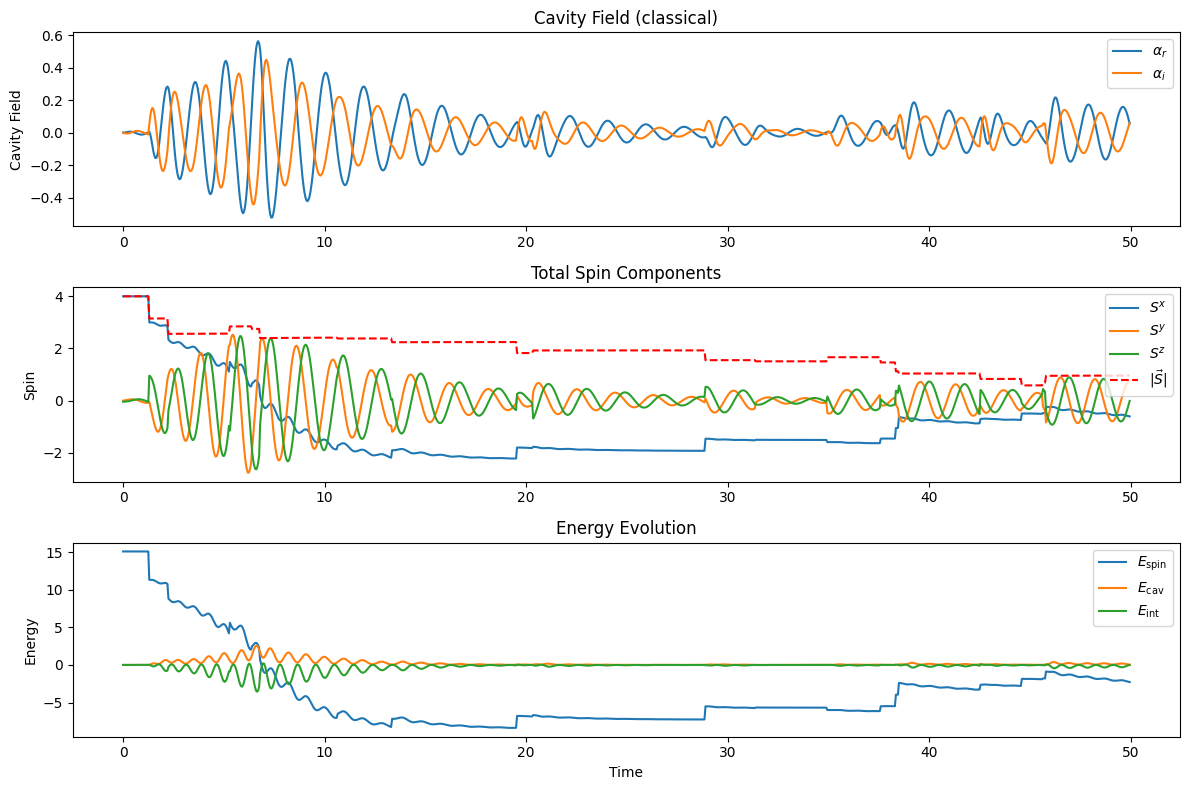

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.linalg import expm

# # System parameters
# delta = -2 * np.pi * 1.0
# kappa = 2 * np.pi * 1.0
# omega_L = 2 * np.pi * 0.6
# Gamma = 2 * np.pi * 6.0 / 10
# Delta = -2 * np.pi * 80.0
# g = 2 * np.pi * 3.0
# g_eff = 2 * np.pi * 0.2
# N = 8
# Omega = 3 * Delta * g_eff / g

# # Time
# t_max = 50
# dt = 0.05
# times = np.arange(0, t_max, dt)

# # Pauli matrices
# sx = np.array([[0, 1], [1, 0]]) / 2
# sy = np.array([[0, -1j], [1j, 0]]) / 2
# sz = np.array([[1, 0], [0, -1]]) / 2
# sp = np.array([[0, 1], [0, 0]])
# sm = np.array([[0, 0], [1, 0]])
# I2 = np.eye(2)

# # Build N-body operators
# def embed(op, n):
#     ops = [I2] * N
#     ops[n] = op
#     out = ops[0]
#     for o in ops[1:]:
#         out = np.kron(out, o)
#     return out

# sx_ops = [embed(sx, n) for n in range(N)]
# sy_ops = [embed(sy, n) for n in range(N)]
# sz_ops = [embed(sz, n) for n in range(N)]
# sp_ops = [embed(sp, n) for n in range(N)]
# sm_ops = [embed(sm, n) for n in range(N)]
# Pup_ops = [embed((I2 + 2 * sz) / 2, n) for n in range(N)]
# Pdown_ops = [embed((I2 - 2 * sz) / 2, n) for n in range(N)]

# dim = 2**N
# identity = np.eye(dim)

# # Initial state: each spin pointing mostly along x
# theta = np.pi / 2 + 0.01
# phi = 0.0
# single_spinor = np.cos(theta / 2) * np.array([1, 0]) + np.sin(theta / 2) * np.exp(1j * phi) * np.array([0, 1])
# psi0 = single_spinor
# for _ in range(N - 1):
#     psi0 = np.kron(psi0, single_spinor)
# psi = psi0.astype(np.complex128)

# # Storage
# alpha_r_list, alpha_i_list = [], []
# Sx_list, Sy_list, Sz_list = [], [], []

# # Initial cavity field
# alpha_r = 0.0
# alpha_i = 0.0

# # Evolution loop
# for t in times:
#     # Expectation values
#     Sx = sum(np.real(psi.conj().T @ sx_ops[n] @ psi) for n in range(N))
#     Sy = sum(np.real(psi.conj().T @ sy_ops[n] @ psi) for n in range(N))
#     Sz = sum(np.real(psi.conj().T @ sz_ops[n] @ psi) for n in range(N))

#     # Store
#     alpha_r_list.append(alpha_r)
#     alpha_i_list.append(alpha_i)
#     Sx_list.append(Sx)
#     Sy_list.append(Sy)
#     Sz_list.append(Sz)

#     # Update classical cavity field
#     dalpha_r = delta * alpha_i - (kappa / 2) * alpha_r
#     dalpha_i = -delta * alpha_r - (kappa / 2) * alpha_i + g_eff * Sz
#     alpha_r += dalpha_r * dt
#     alpha_i += dalpha_i * dt

#     # Dissipation rates
#     Ai = alpha_i
#     A_plus = (Gamma / (18 * Delta**2)) * (Omega + 2 * g * Ai)**2
#     A_minus = (Gamma / (18 * Delta**2)) * (Omega - 2 * g * Ai)**2
#     B_plus = (5 * Gamma / (18 * Delta**2)) * (Omega + (8 / 5) * g * Ai)**2
#     B_minus = (5 * Gamma / (18 * Delta**2)) * (Omega - (8 / 5) * g * Ai)**2

#     # Jump operators
#     jumps = []
#     for n in range(N):
#         jumps += [
#             np.sqrt(A_plus) * sp_ops[n],
#             np.sqrt(A_minus) * sm_ops[n],
#             np.sqrt(B_plus) * Pup_ops[n],
#             np.sqrt(B_minus) * Pdown_ops[n]
#         ]

#     # Effective Hamiltonian
#     H_det = sum(omega_L * sx_ops[n] + 2 * g_eff * alpha_r * sz_ops[n] for n in range(N))
#     H_eff = H_det - 1j / 2 * sum(j.T.conj() @ j for j in jumps)

#     # Deterministic evolution
#     U_eff = expm(-1j * H_eff * dt)
#     psi = U_eff @ psi
#     norm = np.linalg.norm(psi)
#     psi = psi / norm

#     # Stochastic jumps
#     for c in jumps:
#         p_jump = dt * np.real((psi.conj().T @ (c.T.conj() @ c) @ psi))
#         if np.random.rand() < p_jump:
#             psi = c @ psi
#             psi /= np.linalg.norm(psi)

# # Plotting
# t_array = times
# plt.figure(figsize=(12, 8))

# # Cavity field
# plt.subplot(3, 1, 1)
# plt.plot(t_array, alpha_r_list, label=r'$\alpha_r$')
# plt.plot(t_array, alpha_i_list, label=r'$\alpha_i$')
# plt.ylabel('Cavity Field')
# plt.legend()
# plt.title("Cavity Field (c-number)")

# # Spin observables and magnitude
# plt.subplot(3, 1, 2)
# plt.plot(t_array, Sx_list, label=r'$S^x$')
# plt.plot(t_array, Sy_list, label=r'$S^y$')
# plt.plot(t_array, Sz_list, label=r'$S^z$')
# S_mag = np.sqrt(np.array(Sx_list)**2 + np.array(Sy_list)**2 + np.array(Sz_list)**2)
# plt.plot(t_array, S_mag, '--', label=r'$|\vec{S}|$')
# plt.ylabel('Total Spin')
# plt.legend()
# plt.title("Total Spin Components and Magnitude")

# # Energies
# plt.subplot(3, 1, 3)
# E_spin = omega_L * np.array(Sx_list)
# E_cav = -delta * (np.array(alpha_r_list)**2 + np.array(alpha_i_list)**2)
# E_int = 2 * g_eff * np.array(Sz_list) * np.array(alpha_r_list)
# plt.plot(t_array, E_spin, label=r'$E_\mathrm{spin}$')
# plt.plot(t_array, E_cav, label=r'$E_\mathrm{cav}$')
# plt.plot(t_array, E_int, label=r'$E_\mathrm{int}$')
# plt.xlabel('Time')
# plt.ylabel('Energy')
# plt.legend()
# plt.title("Energy Evolution")

# plt.tight_layout()
# plt.show()


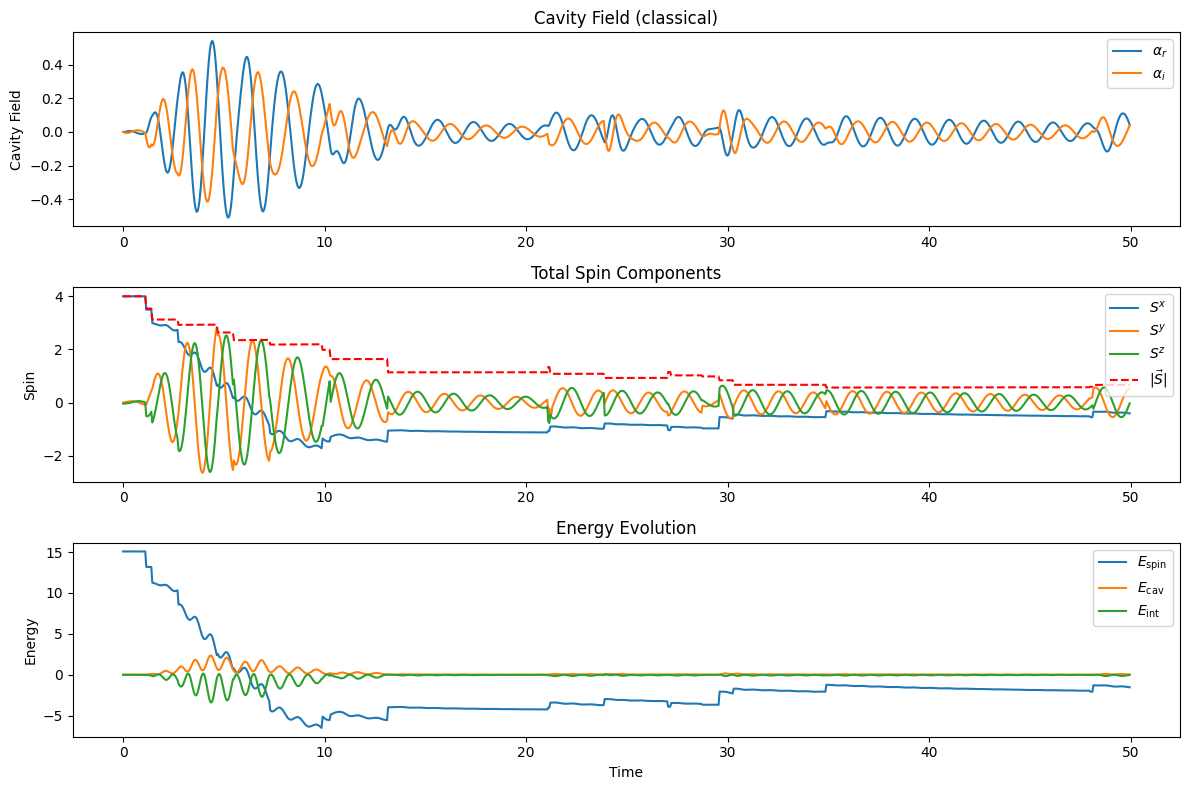

In [ ]:
# import torch
# import numpy as np
# import matplotlib.pyplot as plt

# # Device config
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # System parameters
# pi = torch.tensor(np.pi, dtype=torch.float64)
# delta = -2 * pi * 1.0
# kappa = 2 * pi * 1.0
# omega_L = 2 * pi * 0.6
# Gamma = 2 * pi * 6.0 / 10
# Delta = -2 * pi * 80.0
# g = 2 * pi * 3.0
# g_eff = 2 * pi * 0.2
# N = 8
# Omega = 3 * Delta * g_eff / g

# # Time grid
# t_max = 50
# dt = 0.05
# times = torch.arange(0, t_max, dt, dtype=torch.float64)

# # Pauli matrices
# sx = torch.tensor([[0., 1.], [1., 0.]], dtype=torch.cfloat) / 2
# sy = torch.tensor([[0., -1j], [1j, 0.]], dtype=torch.cfloat) / 2
# sz = torch.tensor([[1., 0.], [0., -1.]], dtype=torch.cfloat) / 2
# sp = torch.tensor([[0., 1.], [0., 0.]], dtype=torch.cfloat)
# sm = torch.tensor([[0., 0.], [1., 0.]], dtype=torch.cfloat)
# I2 = torch.eye(2, dtype=torch.cfloat)

# # Helper: embed operator into full Hilbert space
# def embed(op, n):
#     ops = [I2] * N
#     ops[n] = op
#     result = ops[0]
#     for o in ops[1:]:
#         result = torch.kron(result, o)
#     return result.to(device)

# # Build N-body operators
# ops = {'sx': [], 'sy': [], 'sz': [], 'sp': [], 'sm': [], 'Pup': [], 'Pdown': []}
# for n in range(N):
#     ops['sx'].append(embed(sx, n))
#     ops['sy'].append(embed(sy, n))
#     ops['sz'].append(embed(sz, n))
#     ops['sp'].append(embed(sp, n))
#     ops['sm'].append(embed(sm, n))
#     ops['Pup'].append(embed((I2 + 2 * sz) / 2, n))
#     ops['Pdown'].append(embed((I2 - 2 * sz) / 2, n))

# # Initial spin state (Sx ≈ 0.5, Sz ≈ small)
# theta = np.pi / 2 + 0.01
# phi = 0.0
# spinor = torch.tensor([
#     np.cos(theta / 2),
#     np.sin(theta / 2) * np.exp(1j * phi)
# ], dtype=torch.cfloat).to(device)
# psi = spinor
# for _ in range(N - 1):
#     psi = torch.kron(psi, spinor)
# psi = psi.reshape(-1, 1).to(device)

# # Observables
# alpha_r_list, alpha_i_list = [], []
# Sx_list, Sy_list, Sz_list = [], [], []

# # Initial cavity
# alpha_r = torch.tensor(0.0, dtype=torch.float64)
# alpha_i = torch.tensor(0.0, dtype=torch.float64)

# # Evolution loop
# for t in times:
#     # Store observables first
#     Sx = sum(torch.real((psi.conj().T @ op @ psi)[0, 0]) for op in ops['sx'])
#     Sy = sum(torch.real((psi.conj().T @ op @ psi)[0, 0]) for op in ops['sy'])
#     Sz = sum(torch.real((psi.conj().T @ op @ psi)[0, 0]) for op in ops['sz'])

#     Sx_list.append(Sx.item())
#     Sy_list.append(Sy.item())
#     Sz_list.append(Sz.item())
#     alpha_r_list.append(alpha_r.item())
#     alpha_i_list.append(alpha_i.item())

#     # Compute decay rates (based on old alpha_i)
#     Ai = alpha_i.item()
#     A_plus = (Gamma / (18 * Delta**2)) * (Omega + 2 * g * Ai)**2
#     A_minus = (Gamma / (18 * Delta**2)) * (Omega - 2 * g * Ai)**2
#     B_plus = (5 * Gamma / (18 * Delta**2)) * (Omega + (8 / 5) * g * Ai)**2
#     B_minus = (5 * Gamma / (18 * Delta**2)) * (Omega - (8 / 5) * g * Ai)**2

#     # Jump operators
#     jumps = []
#     for n in range(N):
#         jumps += [
#             torch.sqrt(A_plus) * ops['sp'][n],
#             torch.sqrt(A_minus) * ops['sm'][n],
#             torch.sqrt(B_plus) * ops['Pup'][n],
#             torch.sqrt(B_minus) * ops['Pdown'][n]
#         ]

#     # H_eff = H_det - i/2 sum C†C
#     H_det = sum(omega_L * ops['sx'][n] + 2 * g_eff * alpha_r * ops['sz'][n] for n in range(N))
#     H_eff = H_det.clone()
#     for c in jumps:
#         H_eff -= 0.5j * c.conj().T @ c

#     # Non-Hermitian evolution
#     U_eff = torch.matrix_exp(-1j * H_eff * dt)
#     psi = U_eff @ psi
#     psi = psi / torch.linalg.norm(psi)

#     # Quantum jumps
#     for c in jumps:
#         prob = torch.real((psi.conj().T @ (c.conj().T @ c) @ psi)[0, 0]) * dt
#         if np.random.rand() < prob.item():
#             psi = c @ psi
#             psi = psi / torch.linalg.norm(psi)

#     # Now update cavity using *new* Sz
#     Sz = sum(torch.real((psi.conj().T @ op @ psi)[0, 0]) for op in ops['sz'])
#     dalpha_r = delta * alpha_i - (kappa / 2) * alpha_r
#     dalpha_i = -delta * alpha_r - (kappa / 2) * alpha_i + g_eff * Sz
#     alpha_r += dalpha_r * dt
#     alpha_i += dalpha_i * dt

# # Final observables
# t_array = times.cpu().numpy()
# Sx_array = np.array(Sx_list)
# Sy_array = np.array(Sy_list)
# Sz_array = np.array(Sz_list)
# alpha_r_array = np.array(alpha_r_list)
# alpha_i_array = np.array(alpha_i_list)
# S_mag = np.sqrt(Sx_array**2 + Sy_array**2 + Sz_array**2)

# # Plotting
# plt.figure(figsize=(12, 8))

# # Cavity
# plt.subplot(3, 1, 1)
# plt.plot(t_array, alpha_r_array, label=r'$\alpha_r$')
# plt.plot(t_array, alpha_i_array, label=r'$\alpha_i$')
# plt.title("Cavity Field (classical)")
# plt.ylabel("Cavity Field")
# plt.legend()

# # Spins
# plt.subplot(3, 1, 2)
# plt.plot(t_array, Sx_array, label=r'$S^x$')
# plt.plot(t_array, Sy_array, label=r'$S^y$')
# plt.plot(t_array, Sz_array, label=r'$S^z$')
# plt.plot(t_array, S_mag, '--', label=r'$|\vec{S}|$', color='r')
# plt.title("Total Spin Components")
# plt.ylabel("Spin")
# plt.legend()

# # Energies
# E_spin = omega_L * Sx_array
# E_cav = -delta * (alpha_r_array**2 + alpha_i_array**2)
# E_int = 2 * g_eff * Sz_array * alpha_r_array

# plt.subplot(3, 1, 3)
# plt.plot(t_array, E_spin, label=r'$E_\mathrm{spin}$')
# plt.plot(t_array, E_cav, label=r'$E_\mathrm{cav}$')
# plt.plot(t_array, E_int, label=r'$E_\mathrm{int}$')
# plt.title("Energy Evolution")
# plt.xlabel("Time")
# plt.ylabel("Energy")
# plt.legend()

# plt.tight_layout()
# plt.show()


#### code for many trajectories

---

If init_spin = "random", the inital spin is a random direct product state for each trajectory. 

If init_spin = "fixed OP", the inital spin is set to be a direct product state of all individual spins at the optically pumped state. 

If init_spin = "random OP", the inital spin is set to be the result of a fixed OP + a random global rotation. This is not a real scenario we have in the lab.


C:\Users\luyue\AppData\Local\Temp\ipykernel_44872\1150198884.py:143: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.sqrt(torch.tensor(A_plus)) * ops['sp'][n],
C:\Users\luyue\AppData\Local\Temp\ipykernel_44872\1150198884.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.sqrt(torch.tensor(A_minus)) * ops['sm'][n],
C:\Users\luyue\AppData\Local\Temp\ipykernel_44872\1150198884.py:145: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.sqrt(torch.tensor(B_plus)) * ops['Pup'][n],
C:\Users\luyue\AppData\Local\Temp\ipykernel_44872\

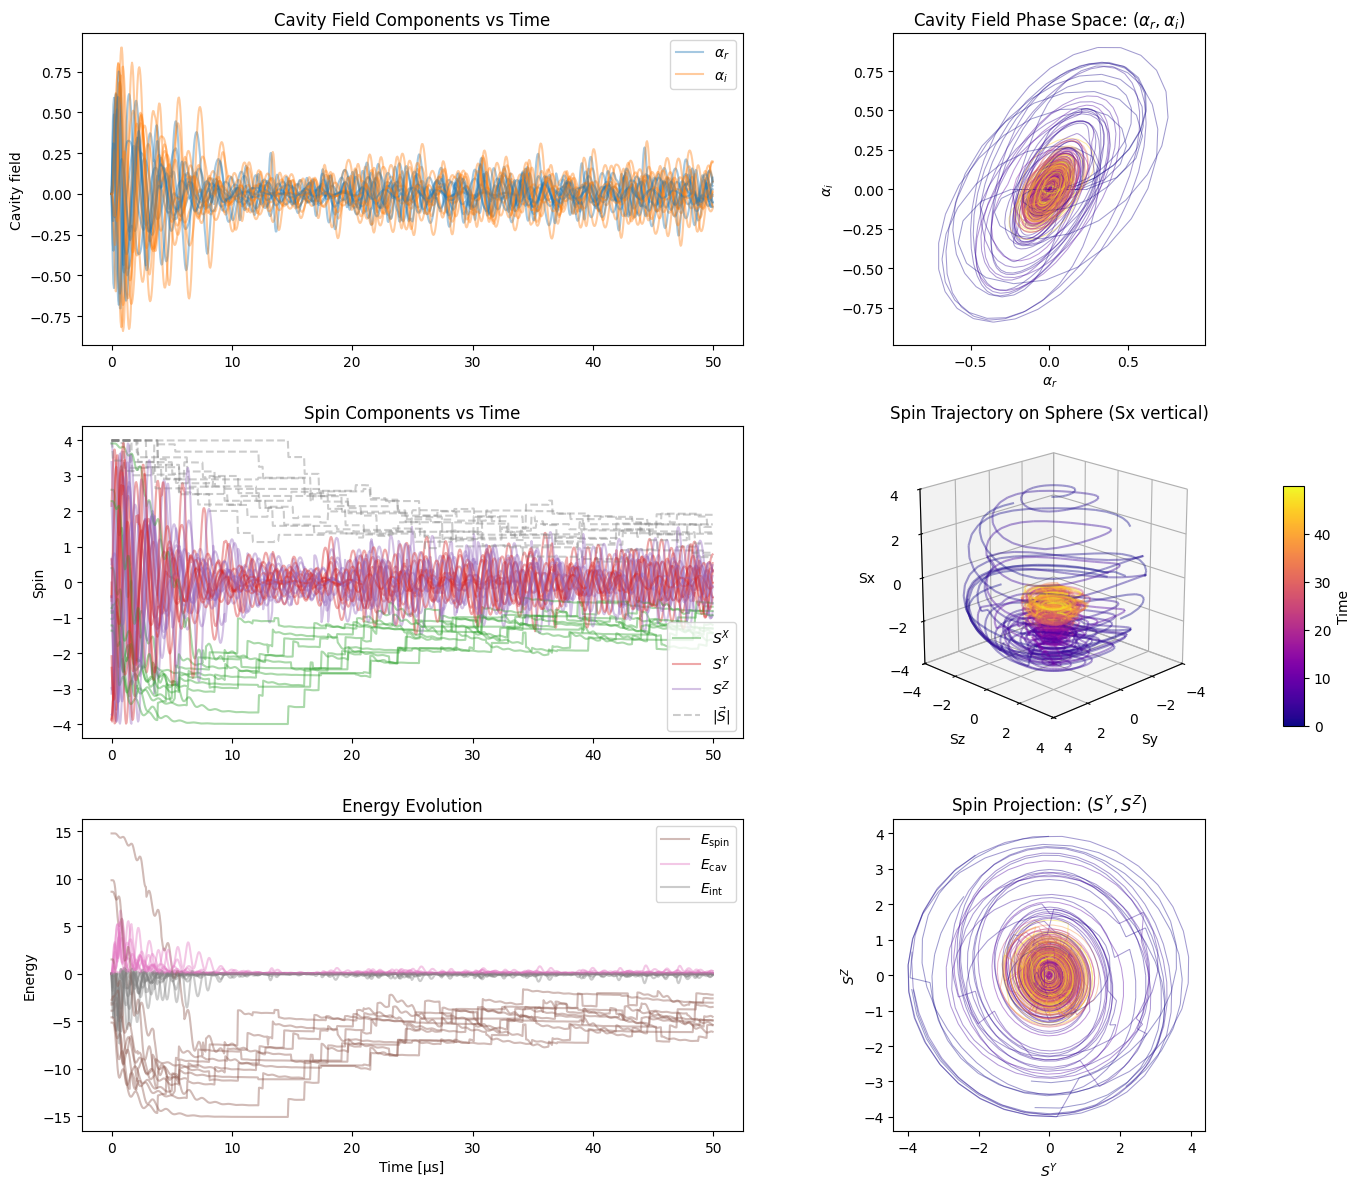

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.collections import LineCollection



# Parallel execution
num_traj = 10
ini_spin = "random"

# System parameters
pi = torch.tensor(np.pi, dtype=torch.float64)
delta = -2 * pi * 1.0
kappa = 2 * pi * 1.0
omega_L = 2 * pi * 0.6
Gamma = 2 * pi * 6.0 / 10
Delta = -2 * pi * 80.0
g = 2 * pi * 3.0
g_eff = 2 * pi * 0.2
N = 8
Omega = 3 * Delta * g_eff / g

# Time grid
t_max = 50
dt = 0.05
times = torch.arange(0, t_max, dt, dtype=torch.float64)

# Operators
sx = torch.tensor([[0., 1.], [1., 0.]], dtype=torch.cfloat) / 2
sy = torch.tensor([[0., -1j], [1j, 0.]], dtype=torch.cfloat) / 2
sz = torch.tensor([[1., 0.], [0., -1.]], dtype=torch.cfloat) / 2
sp = torch.tensor([[0., 1.], [0., 0.]], dtype=torch.cfloat)
sm = torch.tensor([[0., 0.], [1., 0.]], dtype=torch.cfloat)
I2 = torch.eye(2, dtype=torch.cfloat)

def embed(op, i, N):
    ops = [I2] * N
    ops[i] = op
    result = ops[0]
    for o in ops[1:]:
        result = torch.kron(result, o)
    return result

def random_spinor_on_bloch_sphere(seed=None):
    if seed is not None:
        np.random.seed(seed)
    u = np.random.uniform(0, 1)
    theta = np.arccos(1 - 2 * u)  # solid angle uniform
    phi = np.random.uniform(0, 2 * np.pi)
    spinor = torch.tensor([
        np.cos(theta / 2),
        np.sin(theta / 2) * np.exp(1j * phi)
    ], dtype=torch.cfloat)
    return spinor / torch.linalg.norm(spinor)

def simulate_trajectory(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    device = 'cpu'

    # Build operators
    ops = {'sx': [], 'sy': [], 'sz': [], 'sp': [], 'sm': [], 'Pup': [], 'Pdown': []}
    for n in range(N):
        ops['sx'].append(embed(sx, n, N))
        ops['sy'].append(embed(sy, n, N))
        ops['sz'].append(embed(sz, n, N))
        ops['sp'].append(embed(sp, n, N))
        ops['sm'].append(embed(sm, n, N))
        ops['Pup'].append(embed((I2 + 2 * sz) / 2, n, N))
        ops['Pdown'].append(embed((I2 - 2 * sz) / 2, n, N))

    # Initial state (set by spin_init)
    if ini_spin == "fixed OP":
        theta = np.pi / 2 + 0.01
        phi = 0.0
        fixed_spinor = torch.tensor([
            np.cos(theta / 2),
            np.sin(theta / 2) * np.exp(1j * phi)
        ], dtype=torch.cfloat)
        spinor = fixed_spinor 
        psi = spinor
        for _ in range(N - 1):
            psi = torch.kron(psi, spinor)
    
    if ini_spin == "random OP":
        spinor = random_spinor_on_bloch_sphere(seed)
        psi = spinor
        for _ in range(N - 1):
            psi = torch.kron(psi, spinor)
    
    if ini_spin == "random":
        spinor = random_spinor_on_bloch_sphere(seed)
        psi = spinor
        for ii in range(N - 1):
            spinor = random_spinor_on_bloch_sphere(seed+ seed*ii^2)
            psi = spinor
            psi = torch.kron(psi, spinor)
    
    
    
    spinor = random_spinor_on_bloch_sphere(seed)
    psi = spinor
    for _ in range(N - 1):
        psi = torch.kron(psi, spinor)
    psi = psi.reshape(-1, 1)

    # Initialize cavity
    alpha_r = torch.tensor(0.0, dtype=torch.float64)
    alpha_i = torch.tensor(0.0, dtype=torch.float64)

    # Observables
    alpha_r_list, alpha_i_list = [], []
    Sx_list, Sy_list, Sz_list = [], [], []

    for t in times:
        # Measure spin operators
        Sx = sum(torch.real((psi.conj().T @ op @ psi)[0, 0]) for op in ops['sx']).item()
        Sy = sum(torch.real((psi.conj().T @ op @ psi)[0, 0]) for op in ops['sy']).item()
        Sz = sum(torch.real((psi.conj().T @ op @ psi)[0, 0]) for op in ops['sz']).item()

        Sx_list.append(Sx)
        Sy_list.append(Sy)
        Sz_list.append(Sz)
        alpha_r_list.append(alpha_r.item())
        alpha_i_list.append(alpha_i.item())

        # Compute decay rates
        Ai = alpha_i.item()
        A_plus = (Gamma / (18 * Delta**2)) * (Omega + 2 * g * Ai)**2
        A_minus = (Gamma / (18 * Delta**2)) * (Omega - 2 * g * Ai)**2
        B_plus = (5 * Gamma / (18 * Delta**2)) * (Omega + (8/5) * g * Ai)**2
        B_minus = (5 * Gamma / (18 * Delta**2)) * (Omega - (8/5) * g * Ai)**2

        # Collapse ops
        C_ops = []
        for n in range(N):
            C_ops += [
                torch.sqrt(torch.tensor(A_plus)) * ops['sp'][n],
                torch.sqrt(torch.tensor(A_minus)) * ops['sm'][n],
                torch.sqrt(torch.tensor(B_plus)) * ops['Pup'][n],
                torch.sqrt(torch.tensor(B_minus)) * ops['Pdown'][n],
            ]

        # Hamiltonian (only deterministic part)
        H = sum(omega_L * ops['sx'][n] + 2 * g_eff * alpha_i * ops['sz'][n] for n in range(N))
        H_eff = H - 0.5j * sum(c.conj().T @ c for c in C_ops)
        U = torch.matrix_exp(-1j * H_eff * dt)
        psi = U @ psi
        psi = psi / torch.linalg.norm(psi)

        # Apply jumps
        for c in C_ops:
            prob = torch.real((psi.conj().T @ (c.conj().T @ c) @ psi)[0, 0]).item() * dt
            if np.random.rand() < prob:
                psi = c @ psi
                psi = psi / torch.linalg.norm(psi)

        # Re-measure Sz after jump (not before!)
        Sz = sum(torch.real((psi.conj().T @ op @ psi)[0, 0]) for op in ops['sz'])

        # Update cavity with *new* Sz
        dalpha_r = delta * alpha_i - (kappa / 2) * alpha_r - g_eff * Sz
        dalpha_i = -delta * alpha_r - (kappa / 2) * alpha_i 
        alpha_r += dalpha_r * dt
        alpha_i += dalpha_i * dt

    Sx_arr = np.array(Sx_list)
    Sy_arr = np.array(Sy_list)
    Sz_arr = np.array(Sz_list)
    alpha_r_arr = np.array(alpha_r_list)
    alpha_i_arr = np.array(alpha_i_list)

    S_mag = np.sqrt(Sx_arr**2 + Sy_arr**2 + Sz_arr**2)
    E_spin = omega_L * Sx_arr
    E_cav = -delta * (alpha_r_arr**2 + alpha_i_arr**2)
    E_int = 2 * g_eff * Sz_arr * alpha_r_arr

    return dict(
        alpha_r=alpha_r_arr,
        alpha_i=alpha_i_arr,
        Sx=Sx_arr,
        Sy=Sy_arr,
        Sz=Sz_arr,
        S_mag=S_mag,
        E_spin=E_spin,
        E_cav=E_cav,
        E_int=E_int,
        t=times.numpy()
    )




trajectories = []
with ThreadPoolExecutor(max_workers=num_traj) as executor:
    futures = [executor.submit(simulate_trajectory, seed) for seed in range(num_traj)]
    for future in as_completed(futures):
        trajectories.append(future.result())

# Post-processing: average over trajectories
t_array = times.numpy()
alpha_r_mean = np.mean([traj['alpha_r'] for traj in trajectories], axis=0)
alpha_i_mean = np.mean([traj['alpha_i'] for traj in trajectories], axis=0)
Sx_mean = np.mean([traj['Sx'] for traj in trajectories], axis=0)
Sy_mean = np.mean([traj['Sy'] for traj in trajectories], axis=0)
Sz_mean = np.mean([traj['Sz'] for traj in trajectories], axis=0)
S_mag = np.sqrt(Sx_mean**2 + Sy_mean**2 + Sz_mean**2)

# Energy terms
E_spin = omega_L * Sx_mean
E_cav = -delta * (alpha_r_mean**2 + alpha_i_mean**2)
E_int = 2 * g_eff * Sz_mean * alpha_r_mean


# Plot settings
alpha_plot = 0.4
t_eval = t_array
S0_mag = max(np.max(np.abs(r['S_mag'])) for r in trajectories)

# Setup figure: 3x2 layout
fig = plt.figure(figsize=(14, 12))

# Row 1: Time plots (cavity field)
ax1 = plt.subplot(3, 2, 1)
for res in trajectories:
    t = res['t']
    ax1.plot(t, res['alpha_r'], color='C0', alpha=alpha_plot)
    ax1.plot(t, res['alpha_i'], color='C1', alpha=alpha_plot)
ax1.set_title('Cavity Field Components vs Time')
ax1.set_ylabel('Cavity field')
ax1.legend([r'$\alpha_r$', r'$\alpha_i$'])

# Row 2: Spin dynamics
ax2 = plt.subplot(3, 2, 3)
for res in trajectories:
    t = res['t']
    ax2.plot(t, res['Sx'], color='C2', alpha=alpha_plot)
    ax2.plot(t, res['Sy'], color='C3', alpha=alpha_plot)
    ax2.plot(t, res['Sz'], color='C4', alpha=alpha_plot)
    ax2.plot(t, res['S_mag'], '--', color='gray', alpha=alpha_plot)
ax2.set_title('Spin Components vs Time')
ax2.set_ylabel('Spin')
ax2.legend([r'$S^x$', r'$S^y$', r'$S^z$', r'$|\vec{S}|$'])

# Row 3: Energy
ax3 = plt.subplot(3, 2, 5)
for res in trajectories:
    t = res['t']
    ax3.plot(t, res['E_spin'], color='C5', alpha=alpha_plot)
    ax3.plot(t, res['E_cav'], color='C6', alpha=alpha_plot)
    ax3.plot(t, res['E_int'], color='C7', alpha=alpha_plot)
ax3.set_title('Energy Evolution')
ax3.set_xlabel('Time [µs]')
ax3.set_ylabel('Energy')
ax3.legend([r'$E_\mathrm{spin}$', r'$E_\mathrm{cav}$', r'$E_\mathrm{int}$'])

# Right column row 1: Cavity phase space
ax4 = plt.subplot(3, 2, 2)
norm = plt.Normalize(0, t_eval[-1])
for res in trajectories:
    x = res['alpha_r']
    y = res['alpha_i']
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='plasma', norm=norm, alpha=alpha_plot, linewidth=0.75)
    lc.set_array(res['t'])
    ax4.add_collection(lc)
alpha_r_all = np.concatenate([res['alpha_r'] for res in trajectories])
alpha_i_all = np.concatenate([res['alpha_i'] for res in trajectories])
alpha_abs_max = max(np.max(np.abs(alpha_r_all)), np.max(np.abs(alpha_i_all)))
lim = 1.1 * alpha_abs_max
ax4.set_xlim(-lim, lim)
ax4.set_ylim(-lim, lim)
ax4.set_aspect('equal', adjustable='box')
ax4.set_title(r'Cavity Field Phase Space: $(\alpha_r, \alpha_i)$')
ax4.set_xlabel(r'$\alpha_r$')
ax4.set_ylabel(r'$\alpha_i$')

# Right column row 2: 3D spin trajectory
ax5 = fig.add_subplot(3, 2, 4, projection='3d')
norm = plt.Normalize(0, t_eval[-1])
sm = cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
for res in trajectories:
    x, y, z = res['Sy'], res['Sz'], res['Sx']
    points = np.array([x, y, z]).T.reshape(-1, 1, 3)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = Line3DCollection(segments, cmap='plasma', norm=norm, alpha=alpha_plot)
    lc.set_array(res['t'])
    ax5.add_collection3d(lc)
    ax5.scatter(x[-1], y[-1], z[-1], color='black', s=5)
ax5.set_xlim([-S0_mag, S0_mag])
ax5.set_ylim([-S0_mag, S0_mag])
ax5.set_zlim([-S0_mag, S0_mag])
ax5.set_box_aspect([1, 1, 1])
ax5.set_xlabel('Sy')
ax5.set_ylabel('Sz')
ax5.set_zlabel('Sx')
ax5.set_title('Spin Trajectory on Sphere (Sx vertical)')
ax5.view_init(elev=20, azim=45)
cbar_ax = fig.add_axes([0.92, 0.39, 0.015, 0.2])
fig.colorbar(sm, cax=cbar_ax, label='Time')

# Right column row 3: Spin projection
ax6 = plt.subplot(3, 2, 6)
for res in trajectories:
    x = res['Sy']
    y = res['Sz']
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='plasma', norm=norm, alpha=alpha_plot, linewidth=0.75)
    lc.set_array(res['t'])
    ax6.add_collection(lc)
ax6.set_title('Spin Projection: $(S^y, S^z)$')
ax6.set_xlabel(r'$S^y$')
ax6.set_ylabel(r'$S^z$')
ax6.set_xlim([-1.1 * S0_mag, 1.1 * S0_mag])
ax6.set_ylim([-1.1 * S0_mag, 1.1 * S0_mag])
ax6.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.collections import LineCollection



# Parallel execution
num_traj = 10
ini_spin = "random"

# System parameters
pi = torch.tensor(np.pi, dtype=torch.float64)
delta = -2 * pi * 1.2
kappa = 2 * pi * 1.0
omega_L = 2 * pi * 0.6
Gamma = 2 * pi * 6.0 / 10
Delta = -2 * pi * 20.0
g = 2 * pi * 3.0
g_eff = 2 * pi * 0.6
N = 10
Omega = 3 * Delta * g_eff / g

# Time grid
t_max = 50
dt = 0.05
times = torch.arange(0, t_max, dt, dtype=torch.float64)

# Operators
sx = torch.tensor([[0., 1.], [1., 0.]], dtype=torch.cfloat) / 2
sy = torch.tensor([[0., -1j], [1j, 0.]], dtype=torch.cfloat) / 2
sz = torch.tensor([[1., 0.], [0., -1.]], dtype=torch.cfloat) / 2
sp = torch.tensor([[0., 1.], [0., 0.]], dtype=torch.cfloat)
sm = torch.tensor([[0., 0.], [1., 0.]], dtype=torch.cfloat)
I2 = torch.eye(2, dtype=torch.cfloat)

def embed(op, i, N):
    ops = [I2] * N
    ops[i] = op
    result = ops[0]
    for o in ops[1:]:
        result = torch.kron(result, o)
    return result

def random_spinor_on_bloch_sphere(seed=None):
    if seed is not None:
        np.random.seed(seed)
    u = np.random.uniform(0, 1)
    theta = np.arccos(1 - 2 * u)  # solid angle uniform
    phi = np.random.uniform(0, 2 * np.pi)
    spinor = torch.tensor([
        np.cos(theta / 2),
        np.sin(theta / 2) * np.exp(1j * phi)
    ], dtype=torch.cfloat)
    return spinor / torch.linalg.norm(spinor)

def simulate_trajectory(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    device = 'cpu'

    # Build operators
    ops = {'sx': [], 'sy': [], 'sz': [], 'sp': [], 'sm': [], 'Pup': [], 'Pdown': []}
    for n in range(N):
        ops['sx'].append(embed(sx, n, N))
        ops['sy'].append(embed(sy, n, N))
        ops['sz'].append(embed(sz, n, N))
        ops['sp'].append(embed(sp, n, N))
        ops['sm'].append(embed(sm, n, N))
        ops['Pup'].append(embed((I2 + 2 * sz) / 2, n, N))
        ops['Pdown'].append(embed((I2 - 2 * sz) / 2, n, N))

    # Initial state (set by spin_init)
    if ini_spin == "fixed OP":
        theta = np.pi / 2 + 0.01
        phi = 0.0
        fixed_spinor = torch.tensor([
            np.cos(theta / 2),
            np.sin(theta / 2) * np.exp(1j * phi)
        ], dtype=torch.cfloat)
        spinor = fixed_spinor 
        psi = spinor
        for _ in range(N - 1):
            psi = torch.kron(psi, spinor)
    
    if ini_spin == "random OP":
        spinor = random_spinor_on_bloch_sphere(seed)
        psi = spinor
        for _ in range(N - 1):
            psi = torch.kron(psi, spinor)
    
    if ini_spin == "random":
        spinor = random_spinor_on_bloch_sphere(seed)
        psi = spinor
        for ii in range(N - 1):
            spinor = random_spinor_on_bloch_sphere(seed+ seed*ii^2)
            psi = spinor
            psi = torch.kron(psi, spinor)
    
    
    
    spinor = random_spinor_on_bloch_sphere(seed)
    psi = spinor
    for _ in range(N - 1):
        psi = torch.kron(psi, spinor)
    psi = psi.reshape(-1, 1)

    # Initialize cavity
    alpha_r = torch.tensor(0.0, dtype=torch.float64)
    alpha_i = torch.tensor(0.0, dtype=torch.float64)

    # Observables
    alpha_r_list, alpha_i_list = [], []
    Sx_list, Sy_list, Sz_list = [], [], []

    for t in times:
        # Measure spin operators
        Sx = sum(torch.real((psi.conj().T @ op @ psi)[0, 0]) for op in ops['sx']).item()
        Sy = sum(torch.real((psi.conj().T @ op @ psi)[0, 0]) for op in ops['sy']).item()
        Sz = sum(torch.real((psi.conj().T @ op @ psi)[0, 0]) for op in ops['sz']).item()

        Sx_list.append(Sx)
        Sy_list.append(Sy)
        Sz_list.append(Sz)
        alpha_r_list.append(alpha_r.item())
        alpha_i_list.append(alpha_i.item())

        # Compute decay rates
        Ai = alpha_i.item()
        A_plus = (Gamma / (18 * Delta**2)) * (Omega + 2 * g * Ai)**2
        A_minus = (Gamma / (18 * Delta**2)) * (Omega - 2 * g * Ai)**2
        B_plus = (5 * Gamma / (18 * Delta**2)) * (Omega + (8/5) * g * Ai)**2
        B_minus = (5 * Gamma / (18 * Delta**2)) * (Omega - (8/5) * g * Ai)**2

        # Collapse ops
        C_ops = []
        for n in range(N):
            C_ops += [
                torch.sqrt(torch.tensor(A_plus)) * ops['sp'][n],
                torch.sqrt(torch.tensor(A_minus)) * ops['sm'][n],
                torch.sqrt(torch.tensor(B_plus)) * ops['Pup'][n],
                torch.sqrt(torch.tensor(B_minus)) * ops['Pdown'][n],
            ]

        # Hamiltonian (only deterministic part)
        H = sum(omega_L * ops['sx'][n] + 2 * g_eff * alpha_i * ops['sz'][n] for n in range(N))
        H_eff = H - 0.5j * sum(c.conj().T @ c for c in C_ops)
        U = torch.matrix_exp(-1j * H_eff * dt)
        psi = U @ psi
        psi = psi / torch.linalg.norm(psi)

        # Apply jumps
        for c in C_ops:
            prob = torch.real((psi.conj().T @ (c.conj().T @ c) @ psi)[0, 0]).item() * dt
            if np.random.rand() < prob:
                psi = c @ psi
                psi = psi / torch.linalg.norm(psi)

        # Re-measure Sz after jump (not before!)
        Sz = sum(torch.real((psi.conj().T @ op @ psi)[0, 0]) for op in ops['sz'])

        # Update cavity with *new* Sz
        dalpha_r = delta * alpha_i - (kappa / 2) * alpha_r - g_eff * Sz
        dalpha_i = -delta * alpha_r - (kappa / 2) * alpha_i 
        alpha_r += dalpha_r * dt
        alpha_i += dalpha_i * dt

    Sx_arr = np.array(Sx_list)
    Sy_arr = np.array(Sy_list)
    Sz_arr = np.array(Sz_list)
    alpha_r_arr = np.array(alpha_r_list)
    alpha_i_arr = np.array(alpha_i_list)

    S_mag = np.sqrt(Sx_arr**2 + Sy_arr**2 + Sz_arr**2)
    E_spin = omega_L * Sx_arr
    E_cav = -delta * (alpha_r_arr**2 + alpha_i_arr**2)
    E_int = 2 * g_eff * Sz_arr * alpha_r_arr

    return dict(
        alpha_r=alpha_r_arr,
        alpha_i=alpha_i_arr,
        Sx=Sx_arr,
        Sy=Sy_arr,
        Sz=Sz_arr,
        S_mag=S_mag,
        E_spin=E_spin,
        E_cav=E_cav,
        E_int=E_int,
        t=times.numpy()
    )




trajectories = []
with ThreadPoolExecutor(max_workers=num_traj) as executor:
    futures = [executor.submit(simulate_trajectory, seed) for seed in range(num_traj)]
    for future in as_completed(futures):
        trajectories.append(future.result())

# Post-processing: average over trajectories
t_array = times.numpy()
alpha_r_mean = np.mean([traj['alpha_r'] for traj in trajectories], axis=0)
alpha_i_mean = np.mean([traj['alpha_i'] for traj in trajectories], axis=0)
Sx_mean = np.mean([traj['Sx'] for traj in trajectories], axis=0)
Sy_mean = np.mean([traj['Sy'] for traj in trajectories], axis=0)
Sz_mean = np.mean([traj['Sz'] for traj in trajectories], axis=0)
S_mag = np.sqrt(Sx_mean**2 + Sy_mean**2 + Sz_mean**2)

# Energy terms
E_spin = omega_L * Sx_mean
E_cav = -delta * (alpha_r_mean**2 + alpha_i_mean**2)
E_int = 2 * g_eff * Sz_mean * alpha_r_mean


# Plot settings
alpha_plot = 0.4
t_eval = t_array
S0_mag = max(np.max(np.abs(r['S_mag'])) for r in trajectories)

# Setup figure: 3x2 layout
fig = plt.figure(figsize=(14, 12))

# Row 1: Time plots (cavity field)
ax1 = plt.subplot(3, 2, 1)
for res in trajectories:
    t = res['t']
    ax1.plot(t, res['alpha_r'], color='C0', alpha=alpha_plot)
    ax1.plot(t, res['alpha_i'], color='C1', alpha=alpha_plot)
ax1.set_title('Cavity Field Components vs Time')
ax1.set_ylabel('Cavity field')
ax1.legend([r'$\alpha_r$', r'$\alpha_i$'])

# Row 2: Spin dynamics
ax2 = plt.subplot(3, 2, 3)
for res in trajectories:
    t = res['t']
    ax2.plot(t, res['Sx'], color='C2', alpha=alpha_plot)
    ax2.plot(t, res['Sy'], color='C3', alpha=alpha_plot)
    ax2.plot(t, res['Sz'], color='C4', alpha=alpha_plot)
    ax2.plot(t, res['S_mag'], '--', color='gray', alpha=alpha_plot)
ax2.set_title('Spin Components vs Time')
ax2.set_ylabel('Spin')
ax2.legend([r'$S^x$', r'$S^y$', r'$S^z$', r'$|\vec{S}|$'])

# Row 3: Energy
ax3 = plt.subplot(3, 2, 5)
for res in trajectories:
    t = res['t']
    ax3.plot(t, res['E_spin'], color='C5', alpha=alpha_plot)
    ax3.plot(t, res['E_cav'], color='C6', alpha=alpha_plot)
    ax3.plot(t, res['E_int'], color='C7', alpha=alpha_plot)
ax3.set_title('Energy Evolution')
ax3.set_xlabel('Time [µs]')
ax3.set_ylabel('Energy')
ax3.legend([r'$E_\mathrm{spin}$', r'$E_\mathrm{cav}$', r'$E_\mathrm{int}$'])

# Right column row 1: Cavity phase space
ax4 = plt.subplot(3, 2, 2)
norm = plt.Normalize(0, t_eval[-1])
for res in trajectories:
    x = res['alpha_r']
    y = res['alpha_i']
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='plasma', norm=norm, alpha=alpha_plot, linewidth=0.75)
    lc.set_array(res['t'])
    ax4.add_collection(lc)
alpha_r_all = np.concatenate([res['alpha_r'] for res in trajectories])
alpha_i_all = np.concatenate([res['alpha_i'] for res in trajectories])
alpha_abs_max = max(np.max(np.abs(alpha_r_all)), np.max(np.abs(alpha_i_all)))
lim = 1.1 * alpha_abs_max
ax4.set_xlim(-lim, lim)
ax4.set_ylim(-lim, lim)
ax4.set_aspect('equal', adjustable='box')
ax4.set_title(r'Cavity Field Phase Space: $(\alpha_r, \alpha_i)$')
ax4.set_xlabel(r'$\alpha_r$')
ax4.set_ylabel(r'$\alpha_i$')

# Right column row 2: 3D spin trajectory
ax5 = fig.add_subplot(3, 2, 4, projection='3d')
norm = plt.Normalize(0, t_eval[-1])
sm = cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
for res in trajectories:
    x, y, z = res['Sy'], res['Sz'], res['Sx']
    points = np.array([x, y, z]).T.reshape(-1, 1, 3)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = Line3DCollection(segments, cmap='plasma', norm=norm, alpha=alpha_plot)
    lc.set_array(res['t'])
    ax5.add_collection3d(lc)
    ax5.scatter(x[-1], y[-1], z[-1], color='black', s=5)
ax5.set_xlim([-S0_mag, S0_mag])
ax5.set_ylim([-S0_mag, S0_mag])
ax5.set_zlim([-S0_mag, S0_mag])
ax5.set_box_aspect([1, 1, 1])
ax5.set_xlabel('Sy')
ax5.set_ylabel('Sz')
ax5.set_zlabel('Sx')
ax5.set_title('Spin Trajectory on Sphere (Sx vertical)')
ax5.view_init(elev=20, azim=45)
cbar_ax = fig.add_axes([0.92, 0.39, 0.015, 0.2])
fig.colorbar(sm, cax=cbar_ax, label='Time')

# Right column row 3: Spin projection
ax6 = plt.subplot(3, 2, 6)
for res in trajectories:
    x = res['Sy']
    y = res['Sz']
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='plasma', norm=norm, alpha=alpha_plot, linewidth=0.75)
    lc.set_array(res['t'])
    ax6.add_collection(lc)
ax6.set_title('Spin Projection: $(S^y, S^z)$')
ax6.set_xlabel(r'$S^y$')
ax6.set_ylabel(r'$S^z$')
ax6.set_xlim([-1.1 * S0_mag, 1.1 * S0_mag])
ax6.set_ylim([-1.1 * S0_mag, 1.1 * S0_mag])
ax6.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


C:\Users\CavityQED\AppData\Local\Temp\ipykernel_40356\3762889438.py:143: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.sqrt(torch.tensor(A_plus)) * ops['sp'][n],
C:\Users\CavityQED\AppData\Local\Temp\ipykernel_40356\3762889438.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.sqrt(torch.tensor(A_minus)) * ops['sm'][n],
C:\Users\CavityQED\AppData\Local\Temp\ipykernel_40356\3762889438.py:145: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.sqrt(torch.tensor(B_plus)) * ops['Pup'][n],
C:\Users\CavityQED\AppData\Local\Temp\

## quantum spins in a quantum cavity (intermediate regime)

Fully quantum. 

---

We write the Master equation in the form:


$$
\begin{aligned}
\frac{d\rho}{dt} =\; & -i \left[-\delta  a_x^\dagger a_x + \sum_n \left( \omega_L s_n^x  +g_\text{eff} s_n^z (i a_x^\dagger -i a_x)  \right), \rho \right]
+ \kappa \left( a \rho a^\dagger - \tfrac{1}{2} \left\{ a^\dagger a,\; \rho \right\} \right) \\
& + \sum_n \Bigg[ 
L_{n}^{\uparrow \leftarrow \downarrow} \rho {L_{n}^{\uparrow \leftarrow \downarrow}}^\dagger - \tfrac{1}{2} \left\{ {L_{n}^{\uparrow \leftarrow \downarrow}}^\dagger L_{n}^{\uparrow \leftarrow \downarrow}, \rho \right\} 
 \quad + \quad
L_{n}^{\downarrow \leftarrow \uparrow} \rho {L_{n}^{\downarrow \leftarrow \uparrow}}^\dagger - \tfrac{1}{2} \left\{ {L_{n}^{\downarrow \leftarrow \uparrow}}^\dagger L_{n}^{\downarrow \leftarrow \uparrow}, \rho \right\} \\
& \qquad\quad + 
L_{n}^{\uparrow \leftarrow \uparrow} \rho {L_{n}^{\uparrow \leftarrow \uparrow}}^\dagger - \tfrac{1}{2} \left\{ {L_{n}^{\uparrow \leftarrow \uparrow}}^\dagger L_{n}^{\uparrow \leftarrow \uparrow}, \rho \right\} 
  \quad + \quad
L_{n}^{\downarrow \leftarrow \downarrow} \rho {L_{n}^{\downarrow \leftarrow \downarrow}}^\dagger - \tfrac{1}{2} \left\{ {L_{n}^{\downarrow \leftarrow \downarrow}}^\dagger L_{n}^{\downarrow \leftarrow \downarrow}, \rho \right\} 
\Bigg]
\end{aligned}
$$

The four composite jump operators are:

$$
\begin{aligned}
L_{n}^{\uparrow \leftarrow \downarrow} &= \frac{\sqrt{\Gamma}}{3 \sqrt{2} \Delta} \left( \Omega \, \sigma_n^+ + 2 i g \, \sigma_n^+ \otimes a \right), \\
L_{n}^{\downarrow \leftarrow \uparrow} &= \frac{\sqrt{\Gamma}}{3 \sqrt{2} \Delta} \left( \Omega \, \sigma_n^- - 2 i g \, \sigma_n^- \otimes a \right), \\
L_{n}^{\uparrow \leftarrow \uparrow} &= \frac{\sqrt{5\Gamma}}{3 \sqrt{2} \Delta} \left( \Omega \, P_n^\uparrow + \frac{8}{5} i g \, P_n^\uparrow \otimes a \right), \\
L_{n}^{\downarrow \leftarrow \downarrow} &= \frac{\sqrt{5\Gamma}}{3 \sqrt{2} \Delta} \left( \Omega \, P_n^\downarrow - \frac{8}{5} i g \, P_n^\downarrow \otimes a \right).
\end{aligned}
$$

The first line represents coherent evolution (and incoherent cavity dissipation); the second line represents individual spin level optical pump and depumping (the inbalance of the two terms leads to directional optical pumping); the third line represents individual spin level dephasing. $\rho$ is a $2^N \times M$ dimensional tensor, where $M$ is the truncated Fock state basis dimension of the cavity.  

Note:
1. The second and third line operators are composite operators that are multiple (spin jump + cavity decay) that are coherently summed up. 
2. This is an approximation (as discussed in the Hamiltonian and jump operators section)

---
With no approximation of $g \langle a\rangle \ll \Omega$, the Master equation writes:



#### cavity cooling code

After adiabatic elimination of the unwanted states, the Hamiltonian writes as (I will use spin-1/2 chain for simplicity):

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from qutip import *

# --- Parallel execution and initial condition ---
num_traj = 10
ini_spin = "fixed OP"

# --- System parameters ---
delta = -2 * pi * 1.0
kappa = 2 * pi * 1.0 
omega_L = 2 * pi * 0.6
Gamma = 2 * pi * 6.0 *0
Delta = -2 * pi * 80.0
g = 2 * pi * 3.0
g_eff = 2 * pi * 0.55
N = 6  # number of spins
Omega = 3 * Delta * g_eff / g

# --- Time grid ---
t_max = 20
dt = 0.05
tlist = np.arange(0, t_max, dt)

# --- Fock space truncation ---
M = 25

# --- Prefactors ---
A_pref = np.sqrt(Gamma) / (3 * np.sqrt(2) * abs(Delta))
B_pref = np.sqrt(5 * Gamma) / (3 * np.sqrt(2) * abs(Delta))
g1 = 2 * g
g2 = (8 / 5) * g

# --- Elementary operators ---
sm = destroy(2)
sp = sm.dag()
sz = sigmaz()
P_up = sp * sm
P_down = sm * sp
a = destroy(M)

I2 = qeye(2)
IM = qeye(M)

# --- Embedding helpers ---
def embed_spin(op, n):
    ops = [I2] * N + [IM]
    ops[n] = op
    return tensor(ops)

def embed_cavity(op):
    return tensor([I2] * N + [op])

#########################
def random_spinor_on_bloch_sphere(seed=None):
    rng = np.random.default_rng(seed)
    theta = np.arccos(2 * rng.random() - 1)
    phi = 2 * np.pi * rng.random()
    spinor = (np.cos(theta / 2) * basis(2, 0)
              + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)).unit()
    return spinor

# --- Collapse operators ---
c_ops = []
for n in range(N):
    σ_plus = embed_spin(sp, n)
    σ_minus = embed_spin(sm, n)
    P_up_n = embed_spin(P_up, n)
    P_down_n = embed_spin(P_down, n)
    a_op = embed_cavity(a)

    L_ud = A_pref * (Omega * σ_plus + 1j * g1 * σ_plus * a_op)
    L_du = A_pref * (Omega * σ_minus - 1j * g1 * σ_minus * a_op)
    L_uu = B_pref * (Omega * P_up_n + 1j * g2 * P_up_n * a_op)
    L_dd = B_pref * (Omega * P_down_n - 1j * g2 * P_down_n * a_op)

    c_ops += [L_ud, L_du, L_uu, L_dd]

c_ops.append(np.sqrt(kappa) * embed_cavity(a))

# --- Hamiltonian ---
H = -delta * embed_cavity(a.dag() * a)
for n in range(N):
    H += omega_L * 0.5* embed_spin(sigmax(), n)
    H += g_eff * 0.5* embed_spin(sz, n) * (embed_cavity(1j*a.dag() - 1j* a))

# --- Initial state ---
if ini_spin == "fixed OP":
    theta = np.pi / 2 + 0.01
    phi = np.pi *0
    spinor = (np.cos(theta / 2) * basis(2, 0)
              + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)).unit()
    spin_states = [spinor for _ in range(N)]

elif ini_spin == "random OP":
    spinor = random_spinor_on_bloch_sphere(seed=42)
    spin_states = [spinor for _ in range(N)]

elif ini_spin == "random":
    spin_states = [random_spinor_on_bloch_sphere(seed=42 + 13 * i ** 2) for i in range(N)]

else:  # fallback
    spin_states = [basis(2, 1)] * N  # all down


psi_spin = tensor(spin_states)
psi_cavity = basis(M, 0)
psi0 = tensor(psi_spin, psi_cavity)

# --- Observables ---
a_op = embed_cavity(a)
Sx_op = 0.5* sum([embed_spin(sigmax(), n) for n in range(N)])
Sy_op = 0.5* sum([embed_spin(sigmay(), n) for n in range(N)])
Sz_op = 0.5* sum([embed_spin(sigmaz(), n) for n in range(N)])

# --- Solver options ---
opts = {
    "method": "euler",
    "normalize_output": True,
    "store_states": True,
    "progress_bar": "text"
}

# --- Solve (1 trajectory for now) ---
result = ssesolve(
    H,
    psi0,
    tlist,
    sc_ops=c_ops,
    e_ops=[],
    ntraj=1,
    options=opts
)

# --- Extract expectations ---
states = result.states
t = np.array(result.times)

alpha_r = expect((a_op + a_op.dag()) / 2, states)
alpha_i = expect(1j * (a_op.dag() - a_op) / 2, states)

Sx = expect(Sx_op, states)
Sy = expect(Sy_op, states)
Sz = expect(Sz_op, states)
S_mag = np.sqrt(Sx**2 + Sy**2 + Sz**2)

E_spin = omega_L * Sx
E_cav = -delta * expect(a_op.dag() * a_op, states)
E_int = g * expect(Sz_op * (a_op + a_op.dag()), states)

# --- Plot ---
plt.figure(figsize=(10, 12))

# Cavity fields
plt.subplot(3, 1, 1)
plt.plot(t, alpha_r, label=r'$\alpha_r$')
plt.plot(t, alpha_i, label=r'$\alpha_i$')
plt.xlabel('Time [µs]')
plt.ylabel('Cavity field')
plt.title('Cavity Field Dynamics')
plt.legend()

# Spin components
plt.subplot(3, 1, 2)
plt.plot(t, Sx, label=r'$S^x$')
plt.plot(t, Sy, label=r'$S^y$')
plt.plot(t, Sz, label=r'$S^z$')
plt.plot(t, S_mag, '--', label=r'$|\vec{S}|$')
plt.xlabel('Time [µs]')
plt.ylabel('Total Spin')
plt.title('Spin Dynamics')
plt.legend()

# Energy
plt.subplot(3, 1, 3)
plt.plot(t, E_spin, label=r'$E_{\mathrm{spin}}$')
plt.plot(t, E_cav, label=r'$E_{\mathrm{cav}}$')
plt.plot(t, E_int, label=r'$E_{\mathrm{int}}$')
plt.xlabel('Time [µs]')
plt.ylabel('Energy')
plt.title('Energy Components')
plt.legend()

plt.tight_layout()
plt.show()


100.0%. Run time:   0.00s. Est. time left: 00:00:00:00


C:\Users\luyue\AppData\Local\Temp\ipykernel_44872\1309303282.py:30: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  A_pref = np.sqrt(Gamma) / (3 * np.sqrt(2) * abs(Delta))
C:\Users\luyue\AppData\Local\Temp\ipykernel_44872\1309303282.py:31: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  B_pref = np.sqrt(5 * Gamma) / (3 * np.sqrt(2) * abs(Delta))
C:\Users\luyue\AppData\Local\Temp\ipykernel_44872\1309303282.py:80: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  c_ops.append(np.sqrt(kappa) * embed_cavity(a))


MemoryError: Could not allocate memory to create an empty (1600, 1600) Dense matrix.

100.0%. Run time:   0.00s. Est. time left: 00:00:00:00
Total run time:  67.26s


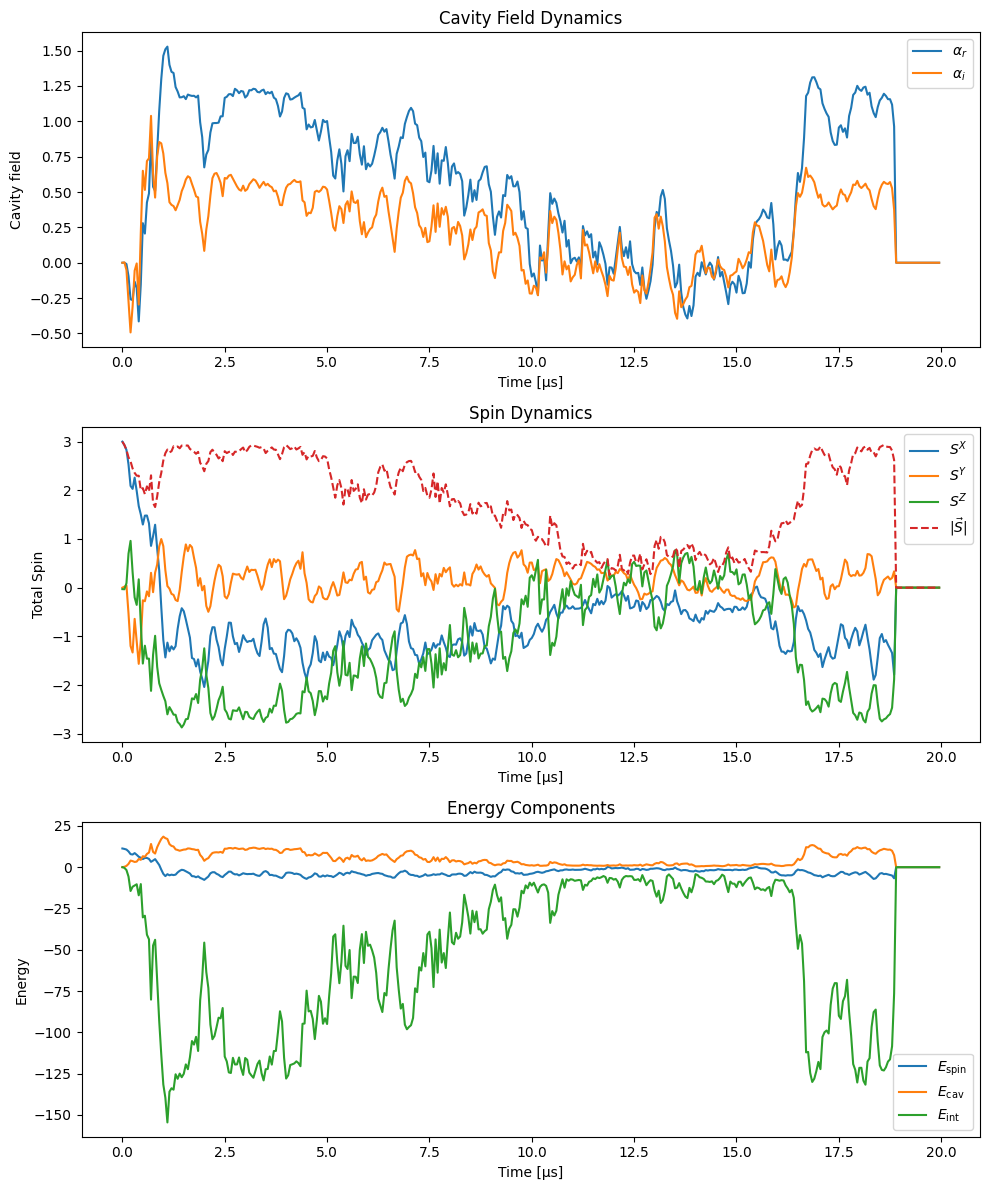

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from qutip import *

# --- Parallel execution and initial condition ---
num_traj = 10
ini_spin = "fixed OP"

# --- System parameters ---
delta = -2 * pi * 1.0
kappa = 2 * pi * 1.0 
omega_L = 2 * pi * 0.6
Gamma = 2 * pi * 6.0 /10
Delta = -2 * pi * 80.0
g = 2 * pi * 3.0
g_eff = 2 * pi * 0.55
N = 6  # number of spins
Omega = 3 * Delta * g_eff / g

# --- Time grid ---
t_max = 20
dt = 0.05
tlist = np.arange(0, t_max, dt)

# --- Fock space truncation ---
M = 25

# --- Prefactors ---
A_pref = np.sqrt(Gamma) / (3 * np.sqrt(2) * abs(Delta))
B_pref = np.sqrt(5 * Gamma) / (3 * np.sqrt(2) * abs(Delta))
g1 = 2 * g
g2 = (8 / 5) * g

# --- Elementary operators ---
sm = destroy(2)
sp = sm.dag()
sz = sigmaz()
P_up = sp * sm
P_down = sm * sp
a = destroy(M)

I2 = qeye(2)
IM = qeye(M)

# --- Embedding helpers ---
def embed_spin(op, n):
    ops = [I2] * N + [IM]
    ops[n] = op
    return tensor(ops)

def embed_cavity(op):
    return tensor([I2] * N + [op])

#########################
def random_spinor_on_bloch_sphere(seed=None):
    rng = np.random.default_rng(seed)
    theta = np.arccos(2 * rng.random() - 1)
    phi = 2 * np.pi * rng.random()
    spinor = (np.cos(theta / 2) * basis(2, 0)
              + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)).unit()
    return spinor

# --- Collapse operators ---
c_ops = []
for n in range(N):
    σ_plus = embed_spin(sp, n)
    σ_minus = embed_spin(sm, n)
    P_up_n = embed_spin(P_up, n)
    P_down_n = embed_spin(P_down, n)
    a_op = embed_cavity(a)

    L_ud = A_pref * (Omega * σ_plus + 1j * g1 * σ_plus * a_op)
    L_du = A_pref * (Omega * σ_minus - 1j * g1 * σ_minus * a_op)
    L_uu = B_pref * (Omega * P_up_n + 1j * g2 * P_up_n * a_op)
    L_dd = B_pref * (Omega * P_down_n - 1j * g2 * P_down_n * a_op)

    c_ops += [L_ud, L_du, L_uu, L_dd]

c_ops.append(np.sqrt(kappa) * embed_cavity(a))

# --- Hamiltonian ---
H = -delta * embed_cavity(a.dag() * a)
for n in range(N):
    H += omega_L * 0.5* embed_spin(sigmax(), n)
    H += g_eff * 0.5* embed_spin(sz, n) * (embed_cavity(1j*a.dag() - 1j* a))

# --- Initial state ---
if ini_spin == "fixed OP":
    theta = np.pi / 2 + 0.01
    phi = np.pi *0
    spinor = (np.cos(theta / 2) * basis(2, 0)
              + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)).unit()
    spin_states = [spinor for _ in range(N)]

elif ini_spin == "random OP":
    spinor = random_spinor_on_bloch_sphere(seed=42)
    spin_states = [spinor for _ in range(N)]

elif ini_spin == "random":
    spin_states = [random_spinor_on_bloch_sphere(seed=42 + 13 * i ** 2) for i in range(N)]

else:  # fallback
    spin_states = [basis(2, 1)] * N  # all down


psi_spin = tensor(spin_states)
psi_cavity = basis(M, 0)
psi0 = tensor(psi_spin, psi_cavity)

# --- Observables ---
a_op = embed_cavity(a)
Sx_op = 0.5* sum([embed_spin(sigmax(), n) for n in range(N)])
Sy_op = 0.5* sum([embed_spin(sigmay(), n) for n in range(N)])
Sz_op = 0.5* sum([embed_spin(sigmaz(), n) for n in range(N)])

# --- Solver options ---
opts = {
    "method": "euler",
    "normalize_output": True,
    "store_states": True,
    "progress_bar": "text"
}

# --- Solve (1 trajectory for now) ---
result = ssesolve(
    H,
    psi0,
    tlist,
    sc_ops=c_ops,
    e_ops=[],
    ntraj=1,
    options=opts
)

# --- Extract expectations ---
states = result.states
t = np.array(result.times)

alpha_r = expect((a_op + a_op.dag()) / 2, states)
alpha_i = expect(1j * (a_op.dag() - a_op) / 2, states)

Sx = expect(Sx_op, states)
Sy = expect(Sy_op, states)
Sz = expect(Sz_op, states)
S_mag = np.sqrt(Sx**2 + Sy**2 + Sz**2)

E_spin = omega_L * Sx
E_cav = -delta * expect(a_op.dag() * a_op, states)
E_int = g * expect(Sz_op * (a_op + a_op.dag()), states)

# --- Plot ---
plt.figure(figsize=(10, 12))

# Cavity fields
plt.subplot(3, 1, 1)
plt.plot(t, alpha_r, label=r'$\alpha_r$')
plt.plot(t, alpha_i, label=r'$\alpha_i$')
plt.xlabel('Time [µs]')
plt.ylabel('Cavity field')
plt.title('Cavity Field Dynamics')
plt.legend()

# Spin components
plt.subplot(3, 1, 2)
plt.plot(t, Sx, label=r'$S^x$')
plt.plot(t, Sy, label=r'$S^y$')
plt.plot(t, Sz, label=r'$S^z$')
plt.plot(t, S_mag, '--', label=r'$|\vec{S}|$')
plt.xlabel('Time [µs]')
plt.ylabel('Total Spin')
plt.title('Spin Dynamics')
plt.legend()

# Energy
plt.subplot(3, 1, 3)
plt.plot(t, E_spin, label=r'$E_{\mathrm{spin}}$')
plt.plot(t, E_cav, label=r'$E_{\mathrm{cav}}$')
plt.plot(t, E_int, label=r'$E_{\mathrm{int}}$')
plt.xlabel('Time [µs]')
plt.ylabel('Energy')
plt.title('Energy Components')
plt.legend()

plt.tight_layout()
plt.show()


100.0%. Run time:   0.00s. Est. time left: 00:00:00:00
Total run time:  63.78s


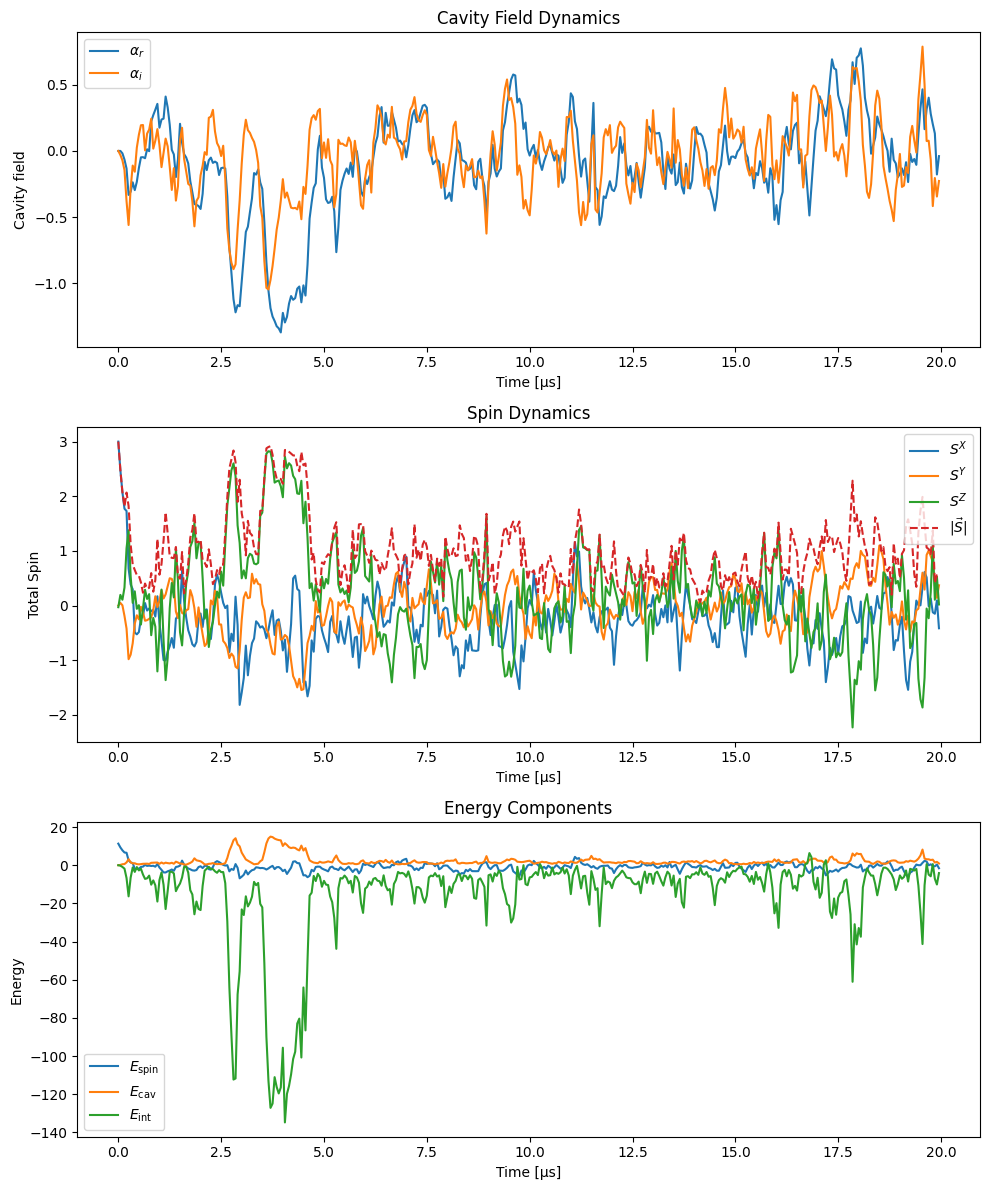

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from qutip import *

# --- Parallel execution and initial condition ---
num_traj = 10
ini_spin = "fixed OP"

# --- System parameters ---
delta = -2 * pi * 1.0
kappa = 2 * pi * 1.0 
omega_L = 2 * pi * 0.6
Gamma = 2 * pi * 6.0 
Delta = -2 * pi * 80.0
g = 2 * pi * 3.0
g_eff = 2 * pi * 0.55
N = 6  # number of spins
Omega = 3 * Delta * g_eff / g

# --- Time grid ---
t_max = 20
dt = 0.05
tlist = np.arange(0, t_max, dt)

# --- Fock space truncation ---
M = 25

# --- Prefactors ---
A_pref = np.sqrt(Gamma) / (3 * np.sqrt(2) * abs(Delta))
B_pref = np.sqrt(5 * Gamma) / (3 * np.sqrt(2) * abs(Delta))
g1 = 2 * g
g2 = (8 / 5) * g

# --- Elementary operators ---
sm = destroy(2)
sp = sm.dag()
sz = sigmaz()
P_up = sp * sm
P_down = sm * sp
a = destroy(M)

I2 = qeye(2)
IM = qeye(M)

# --- Embedding helpers ---
def embed_spin(op, n):
    ops = [I2] * N + [IM]
    ops[n] = op
    return tensor(ops)

def embed_cavity(op):
    return tensor([I2] * N + [op])

#########################
def random_spinor_on_bloch_sphere(seed=None):
    rng = np.random.default_rng(seed)
    theta = np.arccos(2 * rng.random() - 1)
    phi = 2 * np.pi * rng.random()
    spinor = (np.cos(theta / 2) * basis(2, 0)
              + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)).unit()
    return spinor

# --- Collapse operators ---
c_ops = []
for n in range(N):
    σ_plus = embed_spin(sp, n)
    σ_minus = embed_spin(sm, n)
    P_up_n = embed_spin(P_up, n)
    P_down_n = embed_spin(P_down, n)
    a_op = embed_cavity(a)

    L_ud = A_pref * (Omega * σ_plus + 1j * g1 * σ_plus * a_op)
    L_du = A_pref * (Omega * σ_minus - 1j * g1 * σ_minus * a_op)
    L_uu = B_pref * (Omega * P_up_n + 1j * g2 * P_up_n * a_op)
    L_dd = B_pref * (Omega * P_down_n - 1j * g2 * P_down_n * a_op)

    c_ops += [L_ud, L_du, L_uu, L_dd]

c_ops.append(np.sqrt(kappa) * embed_cavity(a))

# --- Hamiltonian ---
H = -delta * embed_cavity(a.dag() * a)
for n in range(N):
    H += omega_L * 0.5* embed_spin(sigmax(), n)
    H += g_eff * 0.5* embed_spin(sz, n) * (embed_cavity(1j*a.dag() - 1j* a))

# --- Initial state ---
if ini_spin == "fixed OP":
    theta = np.pi / 2 + 0.01
    phi = np.pi *0
    spinor = (np.cos(theta / 2) * basis(2, 0)
              + np.sin(theta / 2) * np.exp(1j * phi) * basis(2, 1)).unit()
    spin_states = [spinor for _ in range(N)]

elif ini_spin == "random OP":
    spinor = random_spinor_on_bloch_sphere(seed=42)
    spin_states = [spinor for _ in range(N)]

elif ini_spin == "random":
    spin_states = [random_spinor_on_bloch_sphere(seed=42 + 13 * i ** 2) for i in range(N)]

else:  # fallback
    spin_states = [basis(2, 1)] * N  # all down


psi_spin = tensor(spin_states)
psi_cavity = basis(M, 0)
psi0 = tensor(psi_spin, psi_cavity)

# --- Observables ---
a_op = embed_cavity(a)
Sx_op = 0.5* sum([embed_spin(sigmax(), n) for n in range(N)])
Sy_op = 0.5* sum([embed_spin(sigmay(), n) for n in range(N)])
Sz_op = 0.5* sum([embed_spin(sigmaz(), n) for n in range(N)])

# --- Solver options ---
opts = {
    "method": "euler",
    "normalize_output": True,
    "store_states": True,
    "progress_bar": "text"
}

# --- Solve (1 trajectory for now) ---
result = ssesolve(
    H,
    psi0,
    tlist,
    sc_ops=c_ops,
    e_ops=[],
    ntraj=1,
    options=opts
)

# --- Extract expectations ---
states = result.states
t = np.array(result.times)

alpha_r = expect((a_op + a_op.dag()) / 2, states)
alpha_i = expect(1j * (a_op.dag() - a_op) / 2, states)

Sx = expect(Sx_op, states)
Sy = expect(Sy_op, states)
Sz = expect(Sz_op, states)
S_mag = np.sqrt(Sx**2 + Sy**2 + Sz**2)

E_spin = omega_L * Sx
E_cav = -delta * expect(a_op.dag() * a_op, states)
E_int = g * expect(Sz_op * (a_op + a_op.dag()), states)

# --- Plot ---
plt.figure(figsize=(10, 12))

# Cavity fields
plt.subplot(3, 1, 1)
plt.plot(t, alpha_r, label=r'$\alpha_r$')
plt.plot(t, alpha_i, label=r'$\alpha_i$')
plt.xlabel('Time [µs]')
plt.ylabel('Cavity field')
plt.title('Cavity Field Dynamics')
plt.legend()

# Spin components
plt.subplot(3, 1, 2)
plt.plot(t, Sx, label=r'$S^x$')
plt.plot(t, Sy, label=r'$S^y$')
plt.plot(t, Sz, label=r'$S^z$')
plt.plot(t, S_mag, '--', label=r'$|\vec{S}|$')
plt.xlabel('Time [µs]')
plt.ylabel('Total Spin')
plt.title('Spin Dynamics')
plt.legend()

# Energy
plt.subplot(3, 1, 3)
plt.plot(t, E_spin, label=r'$E_{\mathrm{spin}}$')
plt.plot(t, E_cav, label=r'$E_{\mathrm{cav}}$')
plt.plot(t, E_int, label=r'$E_{\mathrm{int}}$')
plt.xlabel('Time [µs]')
plt.ylabel('Energy')
plt.title('Energy Components')
plt.legend()

plt.tight_layout()
plt.show()
